In [59]:
%load_ext autoreload
%autoreload 2
import Adaptation_Functions as Adaptation
import importlib
import sys
sys.path.append("Adaptation/Adaptation_Functions")
def refresh():
    importlib.reload(Adaptation)
refresh()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [60]:
import numpy as np
import os
import time
import datetime
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import display, Markdown
from PIL import Image
import h5py

In [61]:
sigma = {
        "sigma_ee": 1,
        "sigma_ei": 1,
        "sigma_ie": 3,
        "sigma_ii": 3
        }

weights = {
           "nu_ee": 2.2, # 0.24
           "nu_ei": 3.3, # 0.26
           "nu_ie": 2.6,   # 0.33
           "nu_ii": 0.9, # 0.17
          }

inclination_and_threshold = {
                             "beta_e": 5,
                             "beta_i": 5,
                             "theta_e": 0.05,
                             "theta_i": 0.1,
                            }

parameterset = weights | inclination_and_threshold | sigma

# 1) Connectivity Functions

The three different connectivity functions we use and their Fourier-spectrum

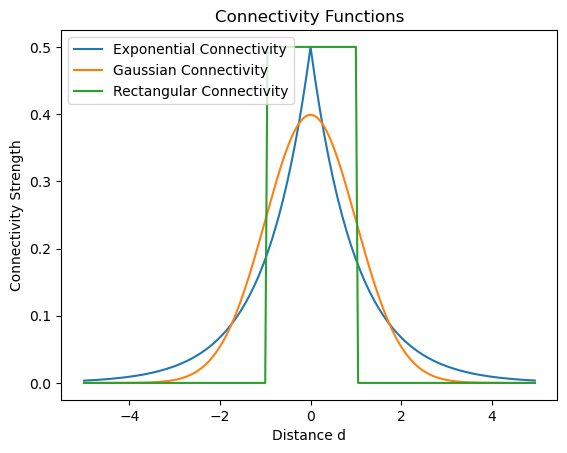

/Users/felixstoffregen/Library/Mobile Documents/com~apple~CloudDocs/Studium/Master/Masterarbeit/Neural_Field_Model/Adaptation_Functions/A0Basic_Functions.py:88: RuntimeWarning: invalid value encountered in divide
  result = np.where(np.isnan(result), 1, result)  # Handle NaN values from previous step


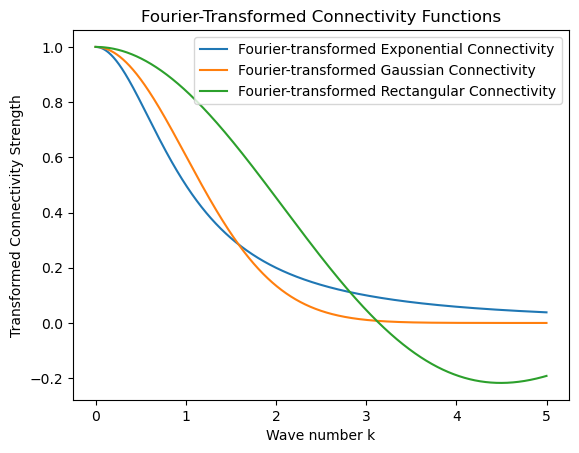

In [176]:
sigma_val= 1
nu = 1
x = np.arange(-5, 5, 5e-2)
w_exp = Adaptation.exponential_connectivity(x, sigma=sigma_val, nu=nu)
w_gauss = Adaptation.gaussian_connectivity(x, sigma=sigma_val, nu=nu)
w_rect = Adaptation.rectangular_connectivity(x, sigma=sigma_val, nu=nu)

plt.plot(x, w_exp, label='Exponential Connectivity')
plt.plot(x, w_gauss, label='Gaussian Connectivity')
plt.plot(x, w_rect, label='Rectangular Connectivity')
plt.xlabel('Distance d')
plt.ylabel('Connectivity Strength')
plt.legend()
plt.title('Connectivity Functions')
plt.show()

k = np.arange(0, 5, 5e-4)
w_exp = Adaptation.fourier_exponential_connectivity(k, sigma=sigma_val, nu=nu)
w_gauss = Adaptation.fourier_gaussian_connectivity(k, sigma=sigma_val, nu=nu)
w_rect = Adaptation.fourier_rectangular_connectivity(k, sigma=sigma_val, nu=nu)

plt.plot(k, w_exp, label='Fourier-transformed Exponential Connectivity')
plt.plot(k, w_gauss, label='Fourier-transformed Gaussian Connectivity')
plt.plot(k, w_rect, label='Fourier-transformed Rectangular Connectivity')
plt.legend()
plt.xlabel('Wave number k')
plt.ylabel('Transformed Connectivity Strength')
plt.title('Fourier-Transformed Connectivity Functions')
plt.show()

Spatial Connectivity assuming equal firing rates of both populations.
They form a wizard hat shape.

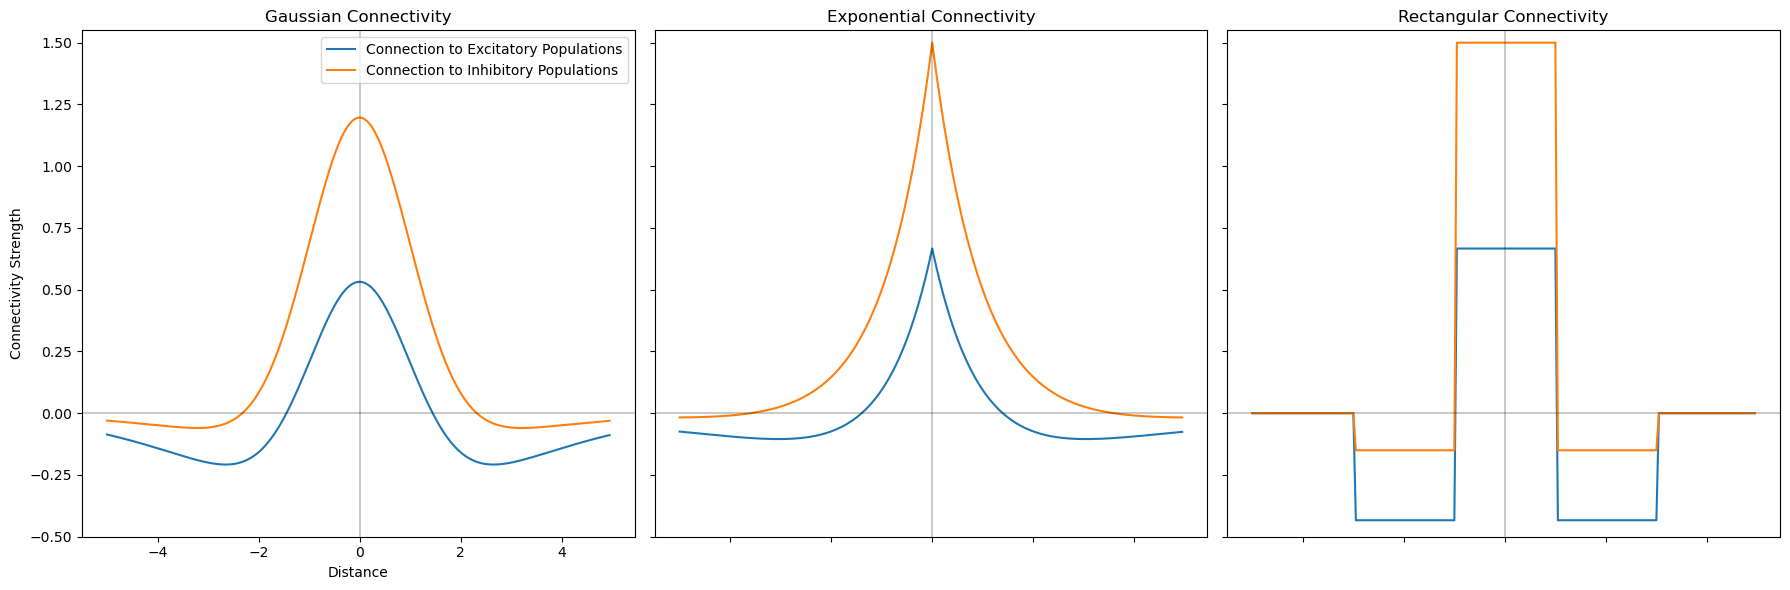

In [76]:
refresh()
param = parameterset

# Define the list of connectivity functions
connectivities = [
    Adaptation.gaussian_connectivity,
    Adaptation.exponential_connectivity,
    Adaptation.rectangular_connectivity
]

# Define the titles for each connectivity function
titles = [
    "Gaussian Connectivity",
    "Exponential Connectivity",
    "Rectangular Connectivity"
]

# Define the range of distances
d = np.arange(-5, 5, 5e-2)

# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, (wmn, title) in enumerate(zip(connectivities, titles)):
    
    # Calculate connectivities
    connect_e = wmn(d, param["sigma_ee"], param["nu_ee"]) - wmn(d, param["sigma_ie"], param["nu_ie"])
    connect_i = - wmn(d, param["sigma_ii"], param["nu_ii"]) + wmn(d, param["sigma_ei"], param["nu_ei"])

    # Plot on the respective subplot
    axes[i].plot(d, connect_e, label='Connection to Excitatory Populations')
    axes[i].plot(d, connect_i,  label='Connection to Inhibitory Populations')
    axes[i].set_title(title)
    axes[i].set_ylim((-0.5, 1.55))
    if i == 0:
        axes[i].set_xlabel('Distance')
        axes[i].set_ylabel('Connectivity Strength')
    else:
        axes[i].set_xticklabels([])
        axes[i].set_yticklabels([])
        
    axes[i].axvline(0, color='black', lw=0.3)
    axes[i].axhline(0, color='black', lw=0.3)

axes[0].legend()
# Adjust layout
plt.tight_layout()
plt.show()


# 2) Points of Equilibrium

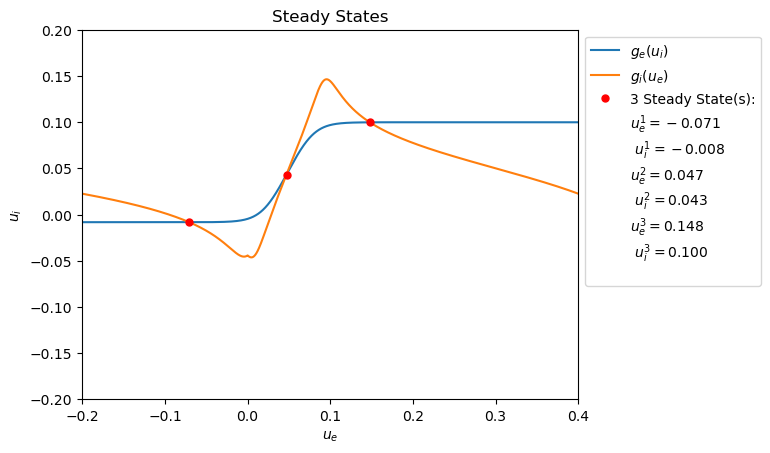

In [178]:
refresh()
param = {"beta_e": 40, "beta_i": 20, "theta_e": 0.05, "theta_i": 0.05} | {"nu_ee": 1, "nu_ii": 1., "nu_ie": 0.8, "nu_ei": 0.9, "g": 1.}
Adaptation.plot_adapt_equilibrium_points(param, I_e=0.0, I_i=0.08, ue_lim=(-0.2, 0.4), ui_lim=(-0.2, 0.2))

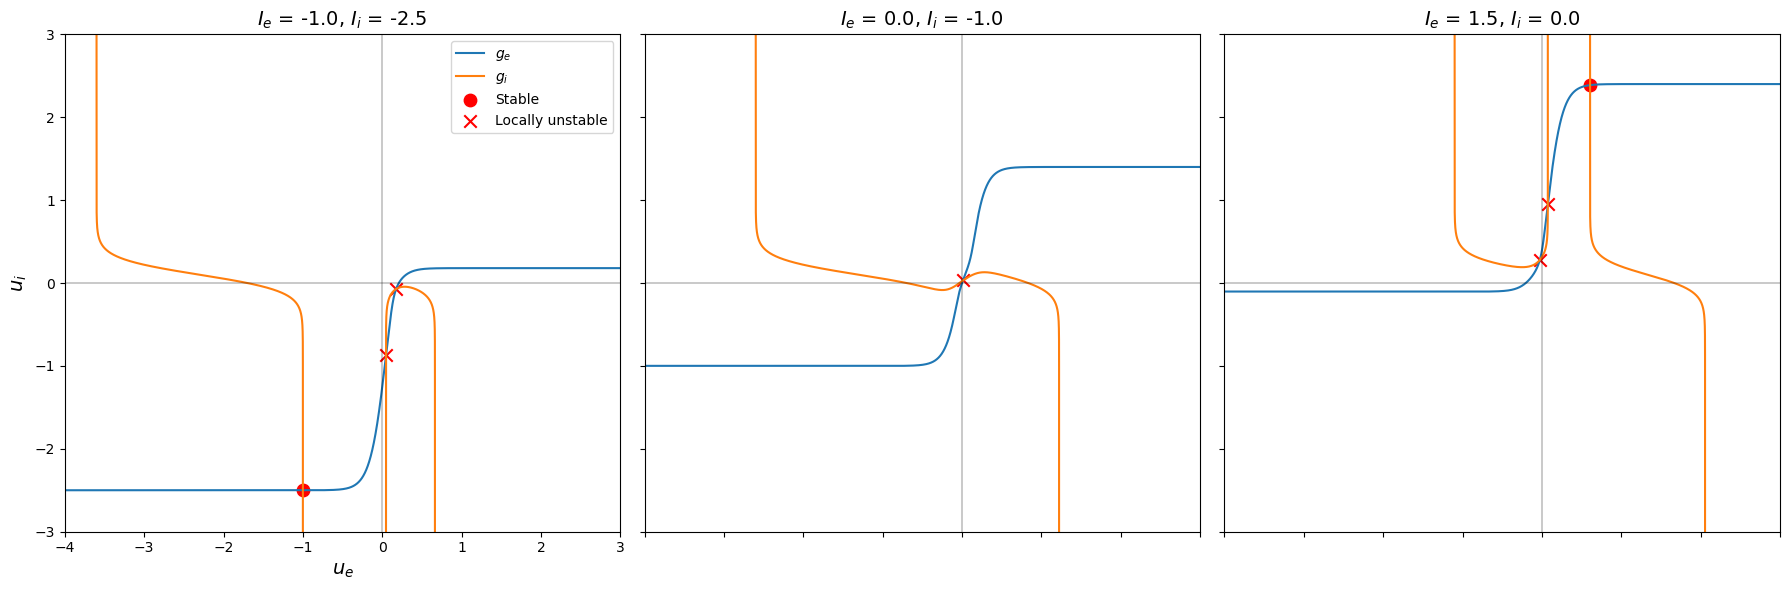

In [77]:
param = parameterset
param["tau_e"] = 20
param["tau_i"] = 40
param["tau_alpha"] = 1200
param["g"] = 0.8
wmn_hat = Adaptation.fourier_gaussian_connectivity

du = 1e-5

I_e = -1
I_i = -2.5

ue_lim = (-4, 3)
ui_lim = (-3, 3)

I_e = -0
I_i = -1

I_e = 1.5
I_i = -0

I_e_list = [-1, 0, 1.5]
I_i_list = [-2.5, -1, 0]

# Define the range of distances
d = np.arange(-5, 5, 5e-2)

# Create a figure with 3 subplots side by side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i in range(3):
    I_e = I_e_list[i]
    I_i = I_i_list[i]
    
    ue1, ui1 = Adaptation.g_e_line(param, I_i, ui_lim=ui_lim, du=du)
    ue2, ui2 = Adaptation.g_i_line(param, I_e, ue_lim=ue_lim, du=du)
    
    ue, ui = Adaptation.get_adapt_equilibrium_points(param=param,
                                                   I_e=I_e, I_i=I_i, du=du,
                                                   ue_lim=ue_lim, ui_lim=ui_lim, warning=False,
                                                   improve_solution=True)
    
    # Plot on the respective subplot
    axes[i].plot(ue1, ui1, label=r"$g_e$")
    axes[i].plot(ue2, ui2, label=r"$g_i$")
    local_label = False
    full_label = False
    for ue_eq, ui_eq in zip(ue, ui):
        color='red'
        if not Adaptation.local_stability(param, ue_eq=ue_eq, ui_eq=ui_eq):
            if local_label:
                axes[i].scatter(ue_eq, ui_eq, s=80, c=color, marker='x')
            else:
                local_label = True
                axes[i].scatter(ue_eq, ui_eq, s=80, c=color, marker='x', label="Locally unstable")
                
        elif Adaptation.adapt_global_stability(param=param, ue_eq=ue_eq, ui_eq=ui_eq, wmn_hat=wmn_hat):
            if full_label:
                axes[i].scatter(ue_eq, ui_eq, s=80, c=color, marker='o')
            else:
                full_label = True
                axes[i].scatter(ue_eq, ui_eq, s=80, c=color, marker='o', label="Stable")
            markerstyle = 'o'
            stab='full'
        else: 
            print('error')
    axes[i].set_title(r"$I_e$" + f" = {I_e:.1f}, " + r"$I_i$" + f" = {I_i:.1f}", fontsize=14)
    if i == 0:
        axes[i].set_xlabel(r"$u_e$", fontsize=14)
        axes[i].set_ylabel(r"$u_i$", fontsize=14)
    else:
        axes[i].set_xticklabels([])
        axes[i].set_yticklabels([])
    axes[i].set_xlim(ue_lim)
    axes[i].set_ylim(ui_lim)
    axes[i].axvline(0, color='black', lw=0.3)
    axes[i].axhline(0, color='black', lw=0.3)

axes[0].legend()
# Adjust layout
plt.tight_layout()
plt.show()

# 3) Eigenvalue Trajektory

## Mixed Turing State in Methodology

I_e:  1.1 I_i:  0.22
ue_eq:  -0.21173003701353055 ui_eq:  0.038638030545863955
['Dynamic Turing', 'Static Turing']
Gain Band:
0.5105105105105106 0.7507507507507507
0.8708708708708709 1.2012012012012012


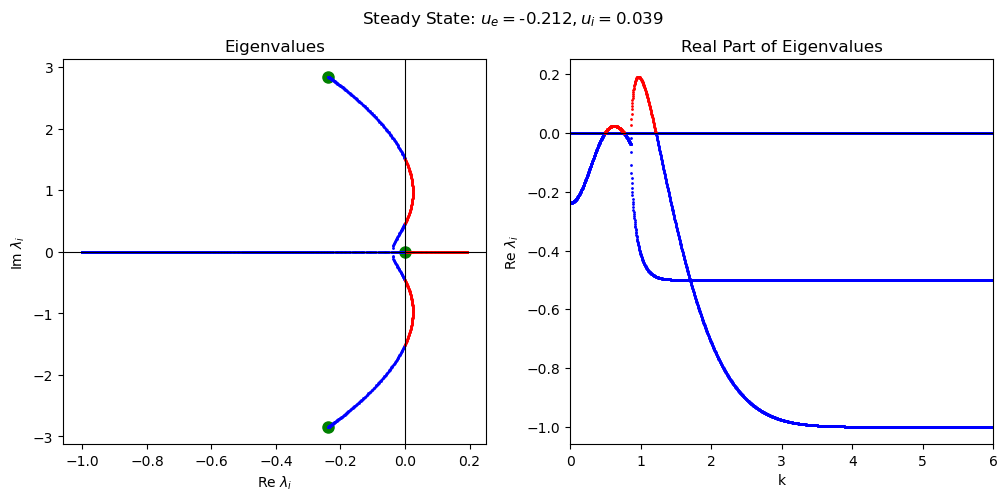


ue_eq:  0.09898679664076601 ui_eq:  1.7259041088542106
['Locally Unstable']

ue_eq:  0.663929789681843 ui_eq:  2.6156894187358013
['Stable']



In [180]:
refresh()
inclination_and_threshold2 = {
                              "beta_e": 5,
                              "beta_i": 5,
                              "theta_e": 0.,
                              "theta_i": 0.,
                             }
param = weights | inclination_and_threshold2 | sigma

param["tau_i"] = 2
param["tau_e"] = 1
param["tau_alpha"] = 1500
param["g"] = 0.05

I_e = 1.1
I_i = 0.22


wmn_hat = Adaptation.fourier_gaussian_connectivity

print("============================================")
print("I_e: ", I_e, "I_i: ", I_i)
print("============================================")
ue, ui= Adaptation.get_adapt_equilibrium_points(param=param, I_e=I_e, I_i=I_i, ue_lim=(-5,5), ui_lim=(-5,5))
for ue_eq, ui_eq in zip(ue, ui):
    print('ue_eq: ', ue_eq, 'ui_eq: ', ui_eq)
    print(Adaptation.type_of_instability(param, ue_eq=ue_eq, ui_eq=ui_eq, wmn_hat=wmn_hat))
    gain_bands = Adaptation.get_gain_bands(param=param, ue_eq=ue_eq, ui_eq=ui_eq, wmn_hat=wmn_hat)
    if gain_bands != "Locally Unstable" and gain_bands != []:
        print('Gain Band:')
        for band in gain_bands:
            print(band[0], band[-1])
        Adaptation.plot_eigenvalues_full_model(param=param,
                                               ue_eq_list=[ue_eq],
                                               ui_eq_list=[ui_eq],
                                               I_e=I_e, I_i=I_i,
                                               wmn_hat=wmn_hat,
                                               k_stop=6)
    print()


## Comparing Eigenvalue Trajectories of Connectivity Functions

I_e: 1.20, I_i:  0.25
ue_eq:  -0.12867707482075544 ui_eq:  0.15426410163226173
['Locally Unstable']
(-0.09, 0.09)


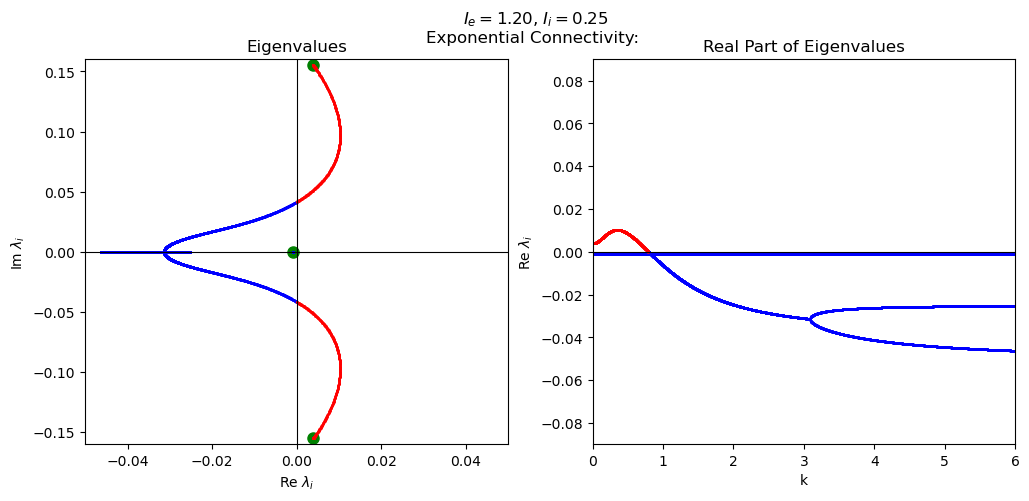


I_e: 1.20, I_i:  0.36
ue_eq:  -0.1674645171065275 ui_eq:  0.14569836971022357
['Stable']
(-0.09, 0.09)


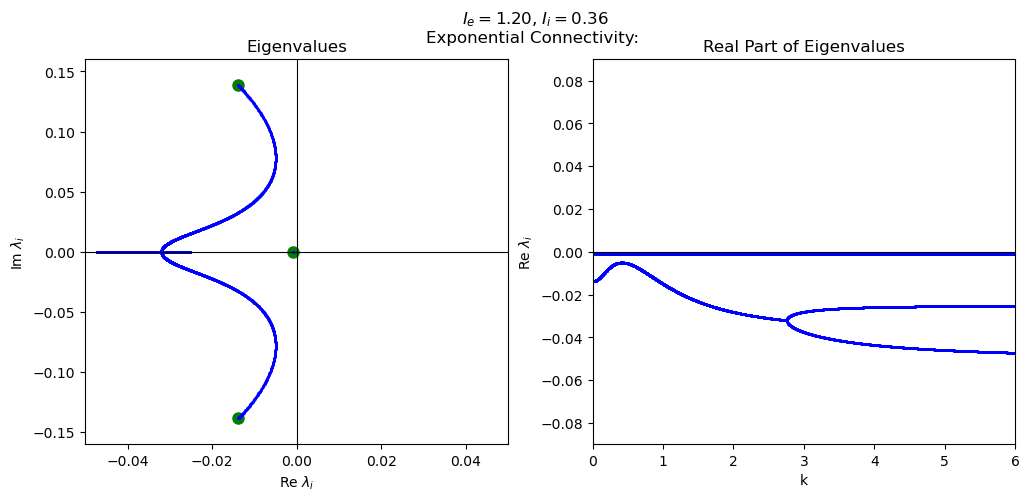

In [40]:
refresh()
param = parameterset

param["tau_e"] = 20
param["tau_i"] = 40
param["tau_alpha"] = 1200
param["g"] = 0.8

I_e = 1.2

re_lim1 = (-0.05, 0.05)
re_lim2 = (-0.09, 0.09)
im_lim = (-0.16, 0.16)

wmn_hat = Adaptation.fourier_exponential_connectivity
connectivity = 'Exponential Connectivity: '
subtitle=True
axs_label=True

for I_i in [0.25, 0.36]:
    print("============================================")
    title = r"$I_e = $" + f"{I_e:.2f}, " + r"$I_i = $" + f"{I_i:.2f}" + "\n" + connectivity
    print(f"I_e: {I_e:.2f}, I_i:  {I_i:.2f}")
    print("============================================")

    ue, ui= Adaptation.get_adapt_equilibrium_points(param=param, I_e=I_e, I_i=I_i, ue_lim=(-5,5), ui_lim=(-5,5))
    ue_eq, ui_eq = ue[0], ui[0]

    print('ue_eq: ', ue_eq, 'ui_eq: ', ui_eq)
    print(Adaptation.type_of_instability(param, ue_eq=ue_eq, ui_eq=ui_eq, wmn_hat=wmn_hat))

    gain_bands = Adaptation.get_gain_bands(param=param, ue_eq=ue_eq, ui_eq=ui_eq, wmn_hat=wmn_hat)
    Adaptation.plot_eigenvalues_full_model(param=param,
                                           ue_eq_list=[ue_eq],
                                           ui_eq_list=[ui_eq],
                                           title=title,
                                           subtitle=subtitle,
                                           axs_label=axs_label,
                                           re_lim1 = re_lim1,
                                           re_lim2 = re_lim2,
                                           im_lim = im_lim,
                                           I_e=I_e, I_i=I_i,
                                           wmn_hat=wmn_hat,
                                           k_stop=6)
    print()


I_e: 1.20, I_i:  0.25
ue_eq:  -0.12867707482051596 ui_eq:  0.15426410163232063
['Locally Unstable']
(-0.09, 0.09)


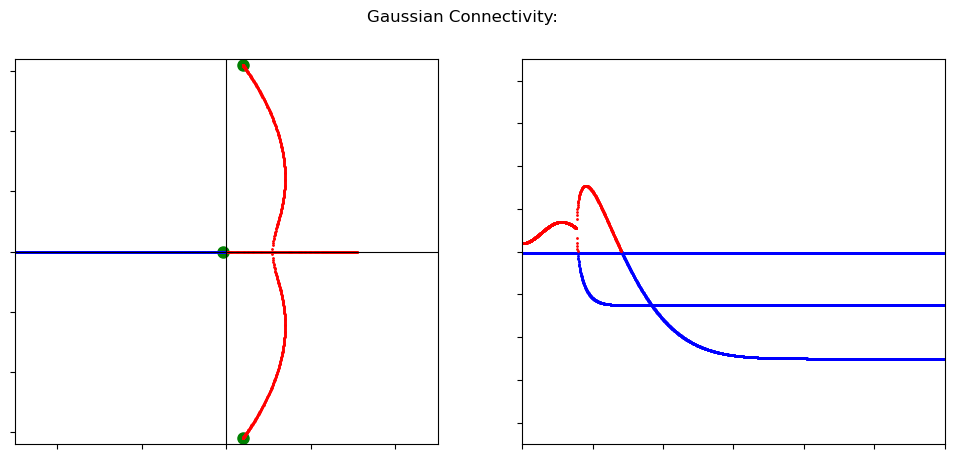


I_e: 1.20, I_i:  0.36
ue_eq:  -0.16746451710652566 ui_eq:  0.14569836971022374
['Static Turing']
(-0.09, 0.09)


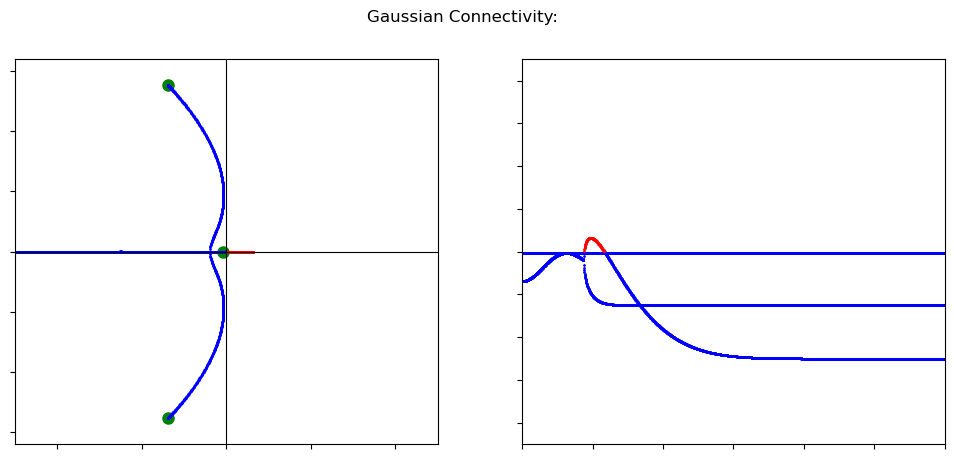

In [38]:
refresh()
param = parameterset

param["tau_e"] = 20
param["tau_i"] = 40
param["tau_alpha"] = 1200
param["g"] = 0.8

I_e = 1.2

re_lim1 = (-0.05, 0.05)
re_lim2 = (-0.09, 0.09)
im_lim = (-0.16, 0.16)

wmn_hat = Adaptation.fourier_gaussian_connectivity
connectivity = 'Gaussian Connectivity: '
subtitle=False
axs_label=False

for I_i in [0.25, 0.36]:
    print("============================================")
    # title = connectivity + "\n" + r"$I_e = $" + f"{I_e:.2f}, " + r"$I_i = $" + f"{I_i:.2f}"
    title = connectivity + "\n"
    print(f"I_e: {I_e:.2f}, I_i:  {I_i:.2f}")
    print("============================================")

    ue, ui= Adaptation.get_adapt_equilibrium_points(param=param, I_e=I_e, I_i=I_i, ue_lim=(-5,5), ui_lim=(-5,5))
    ue_eq, ui_eq = ue[0], ui[0]

    print('ue_eq: ', ue_eq, 'ui_eq: ', ui_eq)
    print(Adaptation.type_of_instability(param, ue_eq=ue_eq, ui_eq=ui_eq, wmn_hat=wmn_hat))

    gain_bands = Adaptation.get_gain_bands(param=param, ue_eq=ue_eq, ui_eq=ui_eq, wmn_hat=wmn_hat)
    Adaptation.plot_eigenvalues_full_model(param=param,
                                           ue_eq_list=[ue_eq],
                                           ui_eq_list=[ui_eq],
                                           title=title,
                                           subtitle=subtitle,
                                           axs_label=axs_label,
                                           re_lim1 = re_lim1,
                                           re_lim2 = re_lim2,
                                           im_lim = im_lim,
                                           I_e=I_e, I_i=I_i,
                                           wmn_hat=wmn_hat,
                                           k_stop=6)
    print()


I_e: 1.20, I_i:  0.25
ue_eq:  -0.12867707482041627 ui_eq:  0.15426410163231716
['Locally Unstable']


/Users/felixstoffregen/Library/Mobile Documents/com~apple~CloudDocs/Studium/Master/Masterarbeit/Neural_Field_Model/Adaptation_Functions/A0Basic_Functions.py:88: RuntimeWarning: invalid value encountered in scalar divide
  result = np.where(np.isclose(denominator, 0), nu, np.sin(denominator) / denominator)


(-0.09, 0.09)


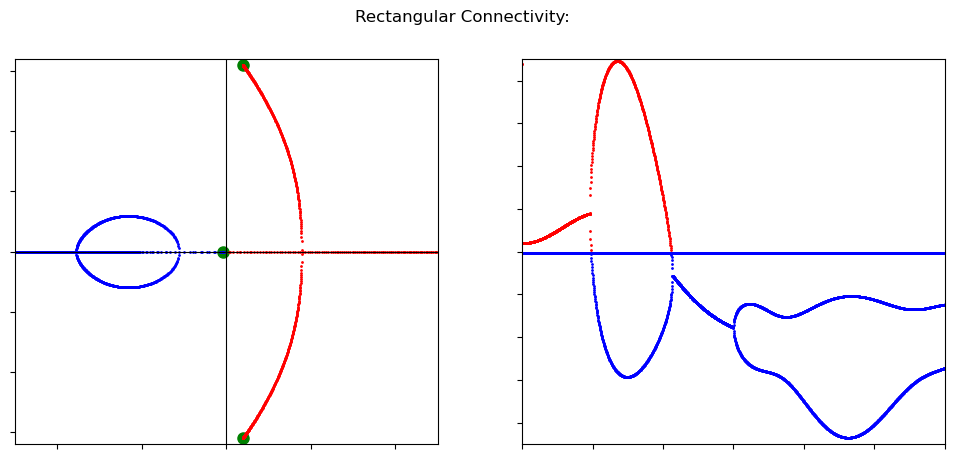


I_e: 1.20, I_i:  0.36
ue_eq:  -0.16746451710652793 ui_eq:  0.1456983697102234
['Dynamic Turing', 'Mixed Turing']
(-0.09, 0.09)


/Users/felixstoffregen/Library/Mobile Documents/com~apple~CloudDocs/Studium/Master/Masterarbeit/Neural_Field_Model/Adaptation_Functions/A0Basic_Functions.py:88: RuntimeWarning: invalid value encountered in divide
  result = np.where(np.isclose(denominator, 0), nu, np.sin(denominator) / denominator)
/Users/felixstoffregen/Library/Mobile Documents/com~apple~CloudDocs/Studium/Master/Masterarbeit/Neural_Field_Model/Adaptation_Functions/A0Basic_Functions.py:88: RuntimeWarning: invalid value encountered in scalar divide
  result = np.where(np.isclose(denominator, 0), nu, np.sin(denominator) / denominator)


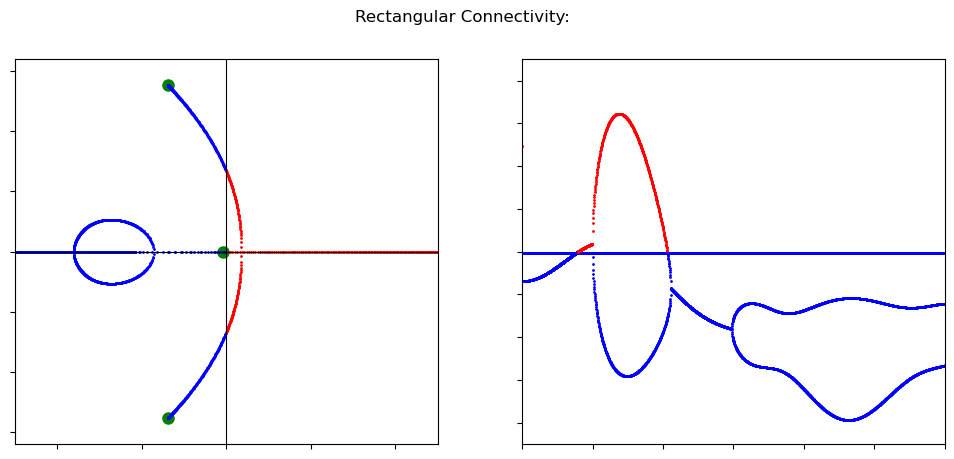

In [39]:
refresh()
param = parameterset

param["tau_e"] = 20
param["tau_i"] = 40
param["tau_alpha"] = 1200
param["g"] = 0.8

I_e = 1.2

re_lim1 = (-0.05, 0.05)
re_lim2 = (-0.09, 0.09)
im_lim = (-0.16, 0.16)

wmn_hat = Adaptation.fourier_rectangular_connectivity
connectivity = 'Rectangular Connectivity: '
subtitle=False
axs_label=False
# subtitle=True
# axs_label=True

for I_i in [0.25, 0.36]:
    print("============================================")
    # title = connectivity + "\n" + r"$I_e = $" + f"{I_e:.2f}, " + r"$I_i = $" + f"{I_i:.2f}"
    title = connectivity + "\n"
    print(f"I_e: {I_e:.2f}, I_i:  {I_i:.2f}")
    print("============================================")

    ue, ui= Adaptation.get_adapt_equilibrium_points(param=param, I_e=I_e, I_i=I_i, ue_lim=(-5,5), ui_lim=(-5,5))
    ue_eq, ui_eq = ue[0], ui[0]

    print('ue_eq: ', ue_eq, 'ui_eq: ', ui_eq)
    print(Adaptation.type_of_instability(param, ue_eq=ue_eq, ui_eq=ui_eq, wmn_hat=wmn_hat))

    gain_bands = Adaptation.get_gain_bands(param=param, ue_eq=ue_eq, ui_eq=ui_eq, wmn_hat=wmn_hat)
    Adaptation.plot_eigenvalues_full_model(param=param,
                                           ue_eq_list=[ue_eq],
                                           ui_eq_list=[ui_eq],
                                           title=title,
                                           subtitle=subtitle,
                                           axs_label=axs_label,
                                           re_lim1 = re_lim1,
                                           re_lim2 = re_lim2,
                                           im_lim = im_lim,
                                           I_e=I_e, I_i=I_i,
                                           wmn_hat=wmn_hat,
                                           k_stop=6)
    print()


# 4) Stability Plane

## Upper and Lower Regions

Gaussian Connectivity
Time to get points of Equilibrium: 965.296
Time for classification: 108.493


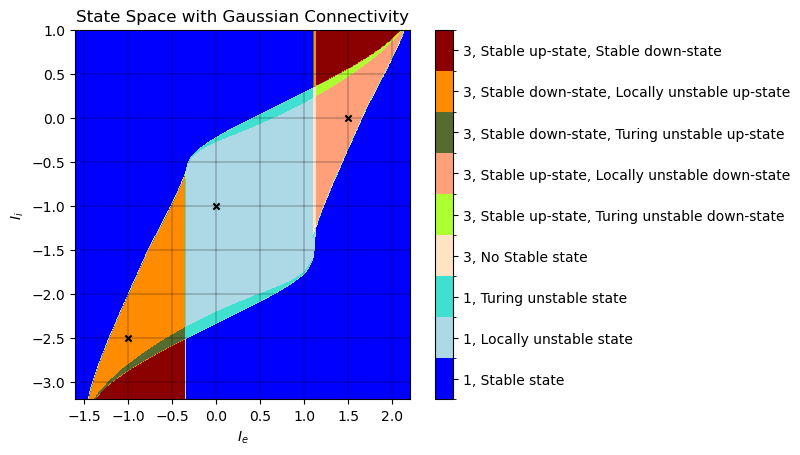

In [68]:
refresh()
param = parameterset

param["tau_e"] = 20
param["tau_i"] = 40
param["tau_alpha"] = 1200
param["g"] = 0.8

Connectivity = [
    # Adaptation.fourier_exponential_connectivity,
    Adaptation.fourier_gaussian_connectivity,
    # Adaptation.fourier_rectangular_connectivity
    ]
Connectivity_names = [
    # "Exponential Connectivity",
    "Gaussian Connectivity",
    # "Rectangular Connectivity"
    ]

dI=5e-3
# dI=5e-2
I_e_start=-1.6
I_e_stop=2.2
I_i_start=-3.2
I_i_stop=1
equilibrium_point_precision=5e-4
only_up_states = False
small_ticks=False
sim_mark_color = "black"
I_e_sim = [-1.0, 0.0, 1.5]
I_i_sim = [-2.5, -1.0, 0.0]

for wmn_hat, name in zip(Connectivity, Connectivity_names):
    print(name)
    res = Adaptation.plot_I_plane(param=param,
                                I_e_start=I_e_start,
                                I_e_stop=I_e_stop,
                                dI_e=dI,
                                only_up_states=only_up_states,
                                I_i_start=I_i_start,
                                I_i_stop=I_i_stop,
                                dI_i=dI,
                                limit=4.5,
                                plot=True,
                                show=False,
                                wmn_hat=wmn_hat,
                                small_ticks=small_ticks,
                                title = 'State Space with ' + name,
                                print_times=True,
                                return_res=True,
                                equilibrium_point_precision=equilibrium_point_precision)
    plt.scatter(I_e_sim, I_i_sim, marker="x", color=sim_mark_color, s=20)

Exponential Connectivity
Time to get points of Equilibrium: 279.093
Time for classification: 21.421
Rectangular Connectivity


/Users/felixstoffregen/Library/Mobile Documents/com~apple~CloudDocs/Studium/Master/Masterarbeit/Neural_Field_Model/Adaptation_Functions/A0Basic_Functions.py:88: RuntimeWarning: invalid value encountered in divide
  result = np.where(np.isclose(denominator, 0), nu, np.sin(denominator) / denominator)
/Users/felixstoffregen/Library/Mobile Documents/com~apple~CloudDocs/Studium/Master/Masterarbeit/Neural_Field_Model/Adaptation_Functions/A0Basic_Functions.py:88: RuntimeWarning: invalid value encountered in scalar divide
  result = np.where(np.isclose(denominator, 0), nu, np.sin(denominator) / denominator)


Time to get points of Equilibrium: 266.873
Time for classification: 97.310


/var/folders/02/jsld0tvd4b5g7yftbxkgk6t80000gn/T/ipykernel_66859/1416145580.py:69: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the colorbar


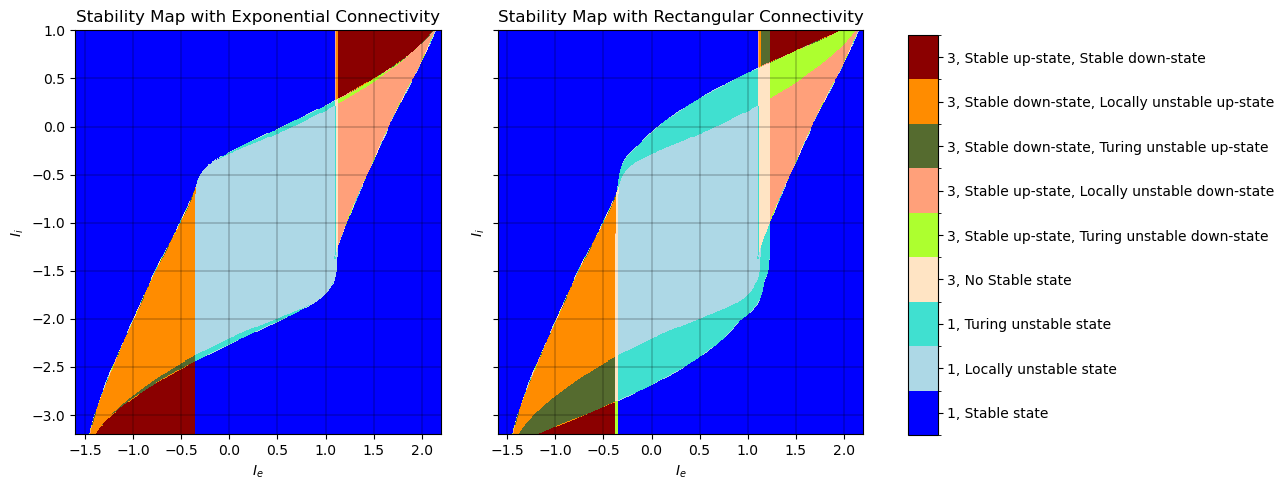

In [10]:
refresh()
import matplotlib.colors as mcolors
param = parameterset

param["tau_e"] = 20
param["tau_i"] = 40
param["tau_alpha"] = 1200
param["g"] = 0.8

Connectivity = [
    Adaptation.fourier_exponential_connectivity,
    Adaptation.fourier_rectangular_connectivity
    ]
Connectivity_names = [
    "Exponential Connectivity",
    "Rectangular Connectivity"
    ]

dI=1e-2
I_e_start=-1.6
I_e_stop=2.2
I_i_start=-3.2
I_i_stop=1
equilibrium_point_precision=5e-4
only_up_states = False
small_ticks = False

fig, axs = plt.subplots(1, len(Connectivity), figsize = (10, 5), sharex=True, sharey=True)
i = 0
legend = False
for wmn_hat, name in zip(Connectivity, Connectivity_names):
    print(name)
    i += 1
    plt.subplot(1, len(Connectivity), i)
    img = Adaptation.plot_I_plane(param=param,
                                I_e_start=I_e_start,
                                I_e_stop=I_e_stop,
                                dI_e=dI,
                                only_up_states=only_up_states,
                                small_ticks=small_ticks,
                                I_i_start=I_i_start,
                                I_i_stop=I_i_stop,
                                dI_i=dI,
                                limit=4.5,
                                plot=True,
                                wmn_hat=wmn_hat,
                                title = 'State Space with ' + name,
                                show=False,
                                legend=legend,
                                print_times=True,
                                return_res=False,
                                return_img=True,
                                equilibrium_point_precision=equilibrium_point_precision)
    
cases = Adaptation.cases_func_full()
colors_for_cases = Adaptation.colors_for_cases_func_full()
cmap_list = [colors_for_cases[case] for case in cases]
cmap = mcolors.ListedColormap(cmap_list)
cbar_ticks = range(len(cases))

# Get the position of the last axis to adjust the colorbar accordingly
pos = axs[-1].get_position()
# cbar_ax = fig.add_axes([pos.x1 + 0.01, pos.y0, 0.02, pos.height + 0.05])  # [left, bottom, width, height]
cbar_ax = fig.add_axes([0.92, 0.12, 0.03, 0.8])  # [left, bottom, width, height]

cbar = plt.colorbar(img, ticks=cbar_ticks, spacing='uniform', cax=cbar_ax)
cbar.ax.set_yticklabels(cases)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the colorbar
plt.show()

## Upper Region

Exponential Connectivity
Time to get points of Equilibrium: 4770.915
Time for classification: 60.831
Gaussian Connectivity
Time to get points of Equilibrium: 5315.999
Time for classification: 97.868
Rectangular Connectivity


/Users/felixstoffregen/Library/Mobile Documents/com~apple~CloudDocs/Studium/Master/Masterarbeit/Neural_Field_Model/Adaptation_Functions/A0Basic_Functions.py:87: RuntimeWarning: invalid value encountered in divide
  result = np.where(np.isclose(denomianator, 0), 0, np.sin(denominator) / denominator)


Time to get points of Equilibrium: 2087.867
Time for classification: 445.357
['1, Stable State', '1, Locally unstable State', '1, Turing unstable State', '3, No Stable State', '3, Stable up-state, Locally unstable down-state', '3, Stable up-state, Static-Turing unstable down-state', '3, Stable up-state, Dynamic-Turing unstable down-state', '3, Stable up-state, Mixed-Turing unstable down-state', '3, Stable up-state, Multiple Gain Bands in down-state', '3, Stable down-state, Locally unstable up-state', '3, Stable up-state, Stable down-state']


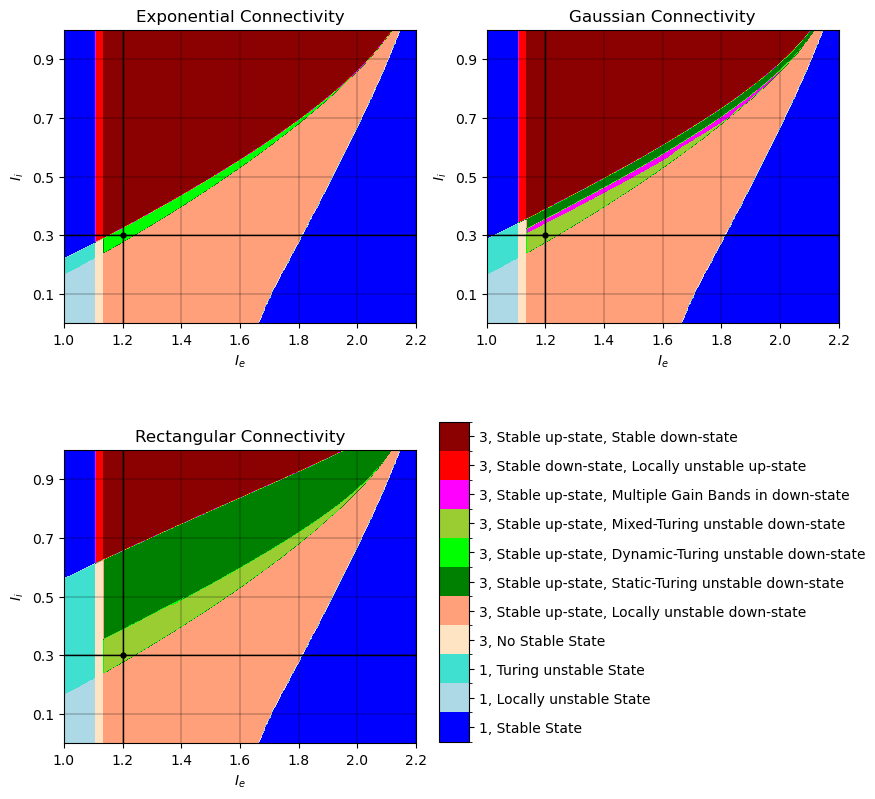

In [ ]:
refresh()
param = parameterset

param["tau_e"] = 20
param["tau_i"] = 40
param["tau_alpha"] = 1200
param["g"] = 0.8
 
I_e_sim = 1.2
I_i_sim = 0.3
sim_mark_color = "black"

Connectivity = [
    Adaptation.fourier_exponential_connectivity,
    Adaptation.fourier_gaussian_connectivity,
    Adaptation.fourier_rectangular_connectivity
    ]
Connectivity_names = [
    "Exponential Connectivity",
    "Gaussian Connectivity",
    "Rectangular Connectivity"
    ]

dI = 2e-3
I_e_start=1
I_e_stop=2.2
I_i_start=0
I_i_stop=1
equilibrium_point_precision=2e-4
only_up_states = True

# fig, axs = plt.subplots(2, 2, figsize = (10, 10))
fig, axs = plt.subplots(2, 2, figsize = (10, 10), sharex=True, sharey=True)
i = 0
legend = False
for wmn_hat, name in zip(Connectivity, Connectivity_names):
    print(name)
    i += 1
    plt.subplot(2, 2, i)
    # if i == 3:
    #     legend = True
    img = Adaptation.plot_I_plane(param=param,
                                I_e_start=I_e_start,
                                I_e_stop=I_e_stop,
                                dI_e=dI,
                                only_up_states=only_up_states,
                                I_i_start=I_i_start,
                                I_i_stop=I_i_stop,
                                dI_i=dI,
                                limit=4.5,
                                plot=True,
                                wmn_hat=wmn_hat,
                                title = name,
                                show=False,
                                legend=legend,
                                print_times=True,
                                return_res=False,
                                return_img=True,
                                equilibrium_point_precision=equilibrium_point_precision)

    plt.axhline(I_i_sim, color=sim_mark_color, linewidth=1)
    plt.axvline(I_e_sim, color=sim_mark_color, linewidth=1)
    plt.scatter(I_e_sim, I_i_sim, color=sim_mark_color, s=12)

# Hide the unused subplot
axs[1, 1].axis('off')
cases = Adaptation.cases_func_only_up()
colors_for_cases = Adaptation.colors_for_cases_func_only_up()
print(cases)
cmap_list = [colors_for_cases[case] for case in cases if case != 'The Rest' ]
cmap = mcolors.ListedColormap(cmap_list)
cbar_ticks = range(len(cases))

# fig.subplots_adjust(right=0.8)
left, bottom, width, height = 0.5, 0.14, 0.03, 0.32
cbar_ax = fig.add_axes([left, bottom, width, height]) # [left, bottom, width, height]

cbar = fig.colorbar(img, ticks=cbar_ticks, spacing='uniform', cax=cbar_ax)
cbar.ax.set_yticklabels(cases)

plt.show()

Exponential Connectivity
Time to get points of Equilibrium: 88.716
Time for classification: 19.468
Gaussian Connectivity
Time to get points of Equilibrium: 232.938
Time for classification: 35.834
Rectangular Connectivity


/Users/felixstoffregen/Library/Mobile Documents/com~apple~CloudDocs/Studium/Master/Masterarbeit/Neural_Field_Model/Adaptation_Functions/A0Basic_Functions.py:87: RuntimeWarning: invalid value encountered in divide
  result = np.where(np.isclose(denomianator, 0), 0, np.sin(denominator) / denominator)


Time to get points of Equilibrium: 1939.842
Time for classification: 1044.818


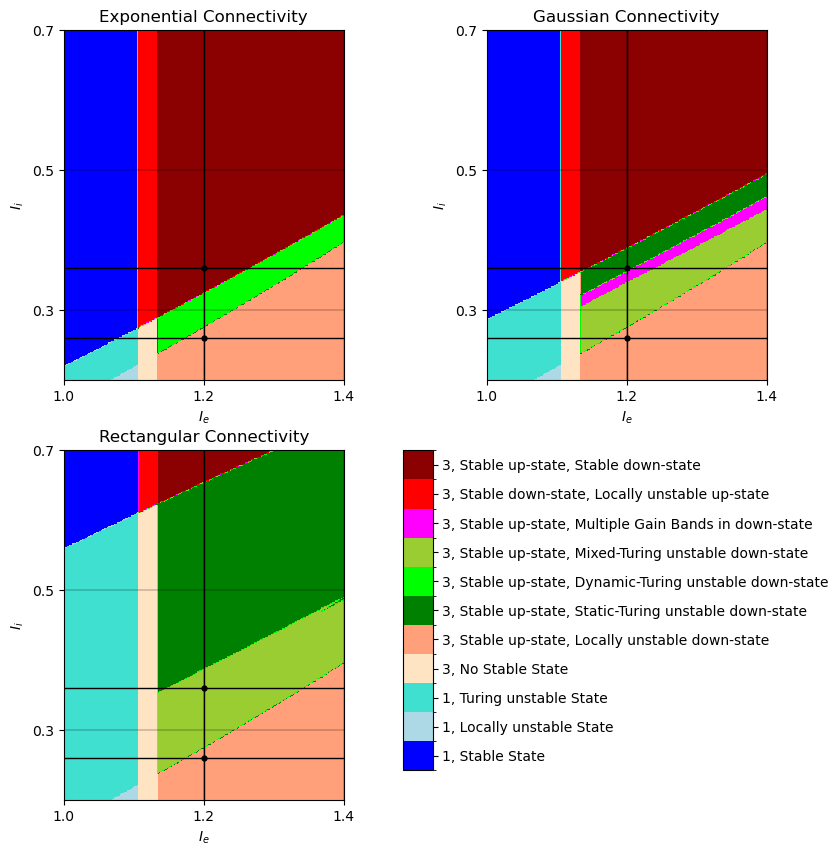

In [ ]:
refresh()
import matplotlib.colors as mcolors
refresh()
param = parameterset

param["tau_e"] = 20
param["tau_i"] = 40
param["tau_alpha"] = 1200
param["g"] = 0.8
 
I_e_sim = 1.2
I_i_sim = 0.26
I_i_sim2 = 0.36
sim_mark_color = "black"

Connectivity = [
    Adaptation.fourier_exponential_connectivity,
    Adaptation.fourier_gaussian_connectivity,
    Adaptation.fourier_rectangular_connectivity
    ]
Connectivity_names = [
    "Exponential Connectivity",
    "Gaussian Connectivity",
    "Rectangular Connectivity"
    ]

dI=2e-3
I_e_start=1
I_e_stop=1.4
I_i_start=0.2
I_i_stop=0.7
equilibrium_point_precision=5e-4
only_up_states = True

# fig, axs = plt.subplots(2, 2, figsize = (10, 10))
fig, axs = plt.subplots(2, 2, figsize = (10, 10), sharex=True, sharey=True)
i = 0
legend = False
for wmn_hat, name in zip(Connectivity, Connectivity_names):
    print(name)
    i += 1
    plt.subplot(2, 2, i)
    # if i == 3:
    #     legend = True
    img = Adaptation.plot_I_plane(param=param,
                                I_e_start=I_e_start,
                                I_e_stop=I_e_stop,
                                dI_e=dI,
                                only_up_states=only_up_states,
                                I_i_start=I_i_start,
                                I_i_stop=I_i_stop,
                                dI_i=dI,
                                limit=4.5,
                                plot=True,
                                wmn_hat=wmn_hat,
                                title = name,
                                show=False,
                                legend=legend,
                                print_times=True,
                                return_res=False,
                                return_img=True,
                                equilibrium_point_precision=equilibrium_point_precision)

    plt.axhline(I_i_sim, color=sim_mark_color, linewidth=1)
    plt.axhline(I_i_sim2, color=sim_mark_color, linewidth=1)
    plt.axvline(I_e_sim, color=sim_mark_color, linewidth=1)
    plt.scatter(I_e_sim, I_i_sim, color=sim_mark_color, s=12)
    plt.scatter(I_e_sim, I_i_sim2, color=sim_mark_color, s=12)

# Hide the unused subplot
axs[1, 1].axis('off')
cases = Adaptation.cases_func_only_up()
colors_for_cases = Adaptation.colors_for_cases_func_only_up()
cmap_list = [colors_for_cases[case] for case in cases]
cmap = mcolors.ListedColormap(cmap_list)
cbar_ticks = range(len(cases))

# fig.subplots_adjust(right=0.8)
left, bottom, width, height = 0.5, 0.14, 0.03, 0.32
cbar_ax = fig.add_axes([left, bottom, width, height]) # [left, bottom, width, height]

cbar = fig.colorbar(img, ticks=cbar_ticks, spacing='uniform', cax=cbar_ax)
cbar.ax.set_yticklabels(cases)

plt.show()

## State Space without adaptation

Gaussian Connectivity
Time to get points of Equilibrium: 3934.667
Time for classification: 1610.418
Rectangular Connectivity


/Users/felixstoffregen/Library/Mobile Documents/com~apple~CloudDocs/Studium/Master/Masterarbeit/Neural_Field_Model/Adaptation_Functions/A0Basic_Functions.py:87: RuntimeWarning: invalid value encountered in divide
  result = np.where(np.isclose(denomianator, 0), 0, np.sin(denominator) / denominator)


Time to get points of Equilibrium: 639.719
Time for classification: 372.510


/var/folders/02/jsld0tvd4b5g7yftbxkgk6t80000gn/T/ipykernel_71255/374868299.py:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the colorbar


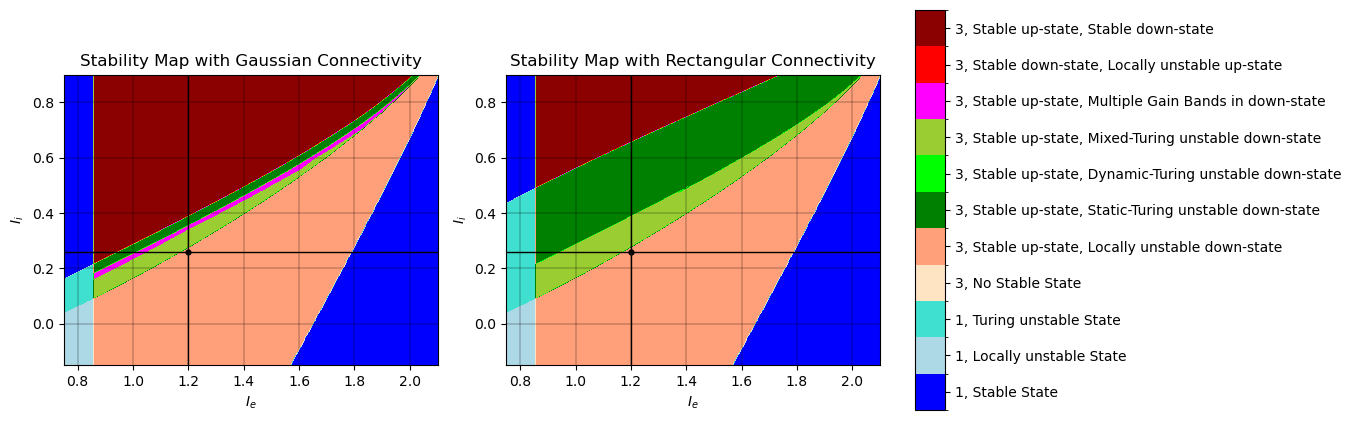

In [ ]:
refresh()
import matplotlib.colors as mcolors
param = parameterset

param["tau_e"] = 20
param["tau_i"] = 40
param["tau_alpha"] = 1200
param["g"] = 0.

Connectivity = [
    Adaptation.fourier_gaussian_connectivity,
    Adaptation.fourier_rectangular_connectivity
    ]
Connectivity_names = [
    "Gaussian Connectivity",
    "Rectangular Connectivity"
    ]

dI=2e-3
I_e_start=0.75
I_e_stop=2.1
I_i_start=-0.15
I_i_stop=0.9
equilibrium_point_precision=5e-4
only_up_states = True
small_ticks = False

# fig, axs = plt.subplots(1, len(Connectivity), figsize = (10, 5))
fig, axs = plt.subplots(2, 2, figsize = (10, 5), sharex=True, sharey=True)
i = 0
legend = False
for wmn_hat, name in zip(Connectivity, Connectivity_names):
    print(name)
    i += 1
    plt.subplot(1, len(Connectivity), i)
    img = Adaptation.plot_I_plane(param=param,
                                I_e_start=I_e_start,
                                I_e_stop=I_e_stop,
                                dI_e=dI,
                                only_up_states=only_up_states,
                                small_ticks=small_ticks,
                                I_i_start=I_i_start,
                                I_i_stop=I_i_stop,
                                dI_i=dI,
                                limit=4.5,
                                plot=True,
                                wmn_hat=wmn_hat,
                                title = 'State Space with ' + name,
                                show=False,
                                legend=legend,
                                print_times=True,
                                return_res=False,
                                return_img=True,
                                equilibrium_point_precision=equilibrium_point_precision)

    plt.axhline(I_i_sim, color=sim_mark_color, linewidth=1)
    plt.axvline(I_e_sim, color=sim_mark_color, linewidth=1)
    plt.scatter(I_e_sim, I_i_sim, color=sim_mark_color, s=12)
    
cases = Adaptation.cases_func_only_up()
colors_for_cases = Adaptation.colors_for_cases_func_only_up()
cmap_list = [colors_for_cases[case] for case in cases]
cmap = mcolors.ListedColormap(cmap_list)
cbar_ticks = range(len(cases))

# Get the position of the last axis to adjust the colorbar accordingly
pos = axs[-1].get_position()
# cbar_ax = fig.add_axes([pos.x1 + 0.01, pos.y0, 0.02, pos.height + 0.05])  # [left, bottom, width, height]
cbar_ax = fig.add_axes([0.92, 0.12, 0.03, 0.8])  # [left, bottom, width, height]

cbar = plt.colorbar(img, ticks=cbar_ticks, spacing='uniform', cax=cbar_ax)
cbar.ax.set_yticklabels(cases)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the colorbar
plt.show()

# 5) Simulation

In [12]:
refresh()
def show_simulation(param,
                    connectivity,
                    I_e,
                    I_i):
     
    print('I_e: ', I_e)
    print('I_i: ', I_i)

    dx = 8e-2
    dt = 2e-1

    x_min = -5
    x_max = 5
    t_max = 50e3
   
    if connectivity == "exp":
        wmn = Adaptation.exponential_connectivity
        wmn_hat = Adaptation.fourier_exponential_connectivity
    elif connectivity == "gauss":
        wmn = Adaptation.gaussian_connectivity
        wmn_hat = Adaptation.fourier_gaussian_connectivity
    elif connectivity == "rect":
        wmn = Adaptation.rectangular_connectivity
        wmn_hat = Adaptation.fourier_rectangular_connectivity
    else:
        raise Exception("No valid Connectivity")

    perturbation_box_size = 0.4
    perturbation_strength = 0.1
    # perturbation_type = 'random'
    perturbation_type = 'box'

    limit_e = 4
    limit_i = 4

    ue_lim = (-limit_e, limit_e)
    ui_lim = (-limit_i, limit_i)

    x = np.arange(x_min, x_max + dx, dx)
    t = np.arange(0, t_max + dt, dt)
    if len(x)%2 != 0: x = x[:-1]

    ue_eqs, ui_eqs = Adaptation.get_adapt_equilibrium_points(param, I_e, I_i, improve_solution=True, ue_lim=ue_lim, ui_lim=ui_lim)

    I_range = 0.1
    dI = 5e-3

    res = Adaptation.plot_I_plane(param=param,
                                I_e_start=I_e - I_range,
                                I_e_stop=I_e + I_range,
                                dI_e=dI,
                                I_i_start=I_i - I_range,
                                I_i_stop=I_i + I_range,
                                dI_i=dI,
                                limit=limit_e,
                                plot=True,
                                wmn_hat=wmn_hat,
                                print_times=True,
                                return_res=False,
                                show=False)
    plt.axhline(y=I_i)
    plt.axvline(x=I_e)
    plt.scatter(I_e,I_i, color="green", s=20)
    plt.show()

    Adaptation.plot_adapt_equilibrium_points(param,
                                            wmn_hat=wmn_hat,
                                            I_e=I_e,
                                            I_i=I_i,
                                            ue_lim=(-1, 2),
                                            ui_lim=(-1, 4),
                                            show_full_stability=True)

    for j, (ue_eq, ui_eq) in enumerate(zip(ue_eqs, ui_eqs)):
        # if j != 2:
        #     continue
        stability = Adaptation.type_of_instability(param=param, ue_eq=ue_eq, ui_eq=ui_eq, wmn_hat=wmn_hat)
        print(f"Type of Instability: {stability}")
        if stability == ['Locally Unstable'] or stability == ['Stable']:
            print('skipped')
            print()
            continue

        ue_0 = np.zeros((len(x),))
        ui_0 = np.zeros((len(x),))
        alpha0 = np.zeros((len(x),))

        ue_0 += ue_eq
        ui_0 += ui_eq
        alpha0 += ue_eq

        # Pertubation
        if perturbation_type == "box":
            mask = abs(x) <= perturbation_box_size
            ue_0[mask] += perturbation_strength
            ui_0[mask] += perturbation_strength
            alpha0[mask] += perturbation_strength

        elif perturbation_type == "random":
            pert = (2 * np.random.rand(len(x), ) - 1) * perturbation_strength
            ue_0 += pert
            ui_0 += pert
            alpha0 += pert
        else:
            raise Exception('No valid perturbation given')

        stability = Adaptation.type_of_instability(param=param, ue_eq=ue_eq, ui_eq=ui_eq, wmn_hat=wmn_hat)
        print(f"ue_0: {ue_eq}")
        print(f"ui_0: {ui_eq}")
        print(f"alpha: {ue_eq}")

        u_e, u_i, alpha = Adaptation.create_spatial_adapt_plot(ue_0=ue_0, ui_0=ui_0, alpha0=alpha0,
                                                                I_e=I_e, I_i=I_i,
                                                                x=x, t=t,
                                                                w=wmn,
                                                                steps=10,
                                                                param=param,
                                                                fft=True, averages=False,
                                                                show_fft=False)
        
        Adaptation.plot_first_node(t=t, u_e=u_e, u_i=u_i, alpha=alpha, t_start=5, cutoff_frequency = 10)
        # t_1 = int(95 * 1000 / dt)
        # t_2 = int(100 * 1000 / dt)
        # Adaptation.wave_speed_plot(u_e[:, t_1:t_2], x, t[t_1:t_2])

    t_start = 10
    t_stop = 15
    t_new = t/1000
    if t_stop==None: t_stop=t_new[-1]
    mask = np.where((t_new >= t_start) & (t_new <= t_stop))
    t_new = t_new[mask]
    ue_first = u_e[0, :][mask]  
    ui_first = u_i[0, :][mask]
    alpha_first = alpha[0, :][mask]

    print("u_e max: ", max(ue_first), "u_e min: ", min(ue_first))
    print("u_i max: ", max(ui_first), "u_i min: ", min(ui_first))

    fig, ax1 = plt.subplots()
    ax1.plot(t_new, ue_first, 'b', label=r'$u_e$')
    ax1.set_xlabel('t [s]')
    ax1.set_ylabel('Excitatory Input Voltage', color='b')
    ax1.tick_params('y', colors='b')
    ax2 = ax1.twinx()
    ax2.plot(t_new, alpha_first, 'darkorange', label=r'$\alpha$')
    ax2.tick_params('y', colors='darkorange')
    ax2.set_ylabel('Adaptation', color='darkorange')
    fig.tight_layout()
    # fig.legend()
    plt.show()

## Simulations with Adaptation

### Gaussian Connectiivity

I_e:  1.2
I_i:  0.3
Time to get points of Equilibrium: 3.611
Time for classification: 2.776


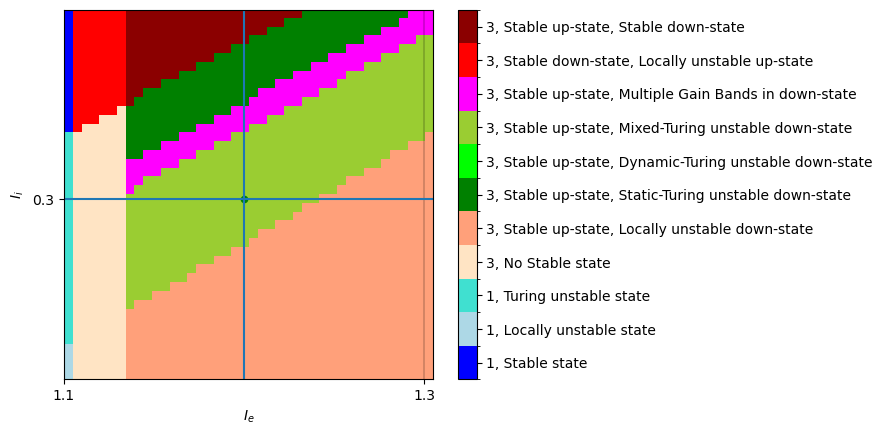

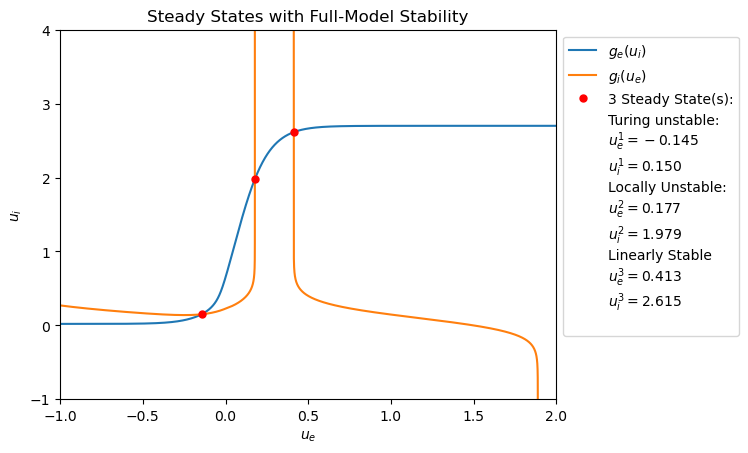

Type of Instability: ['Mixed Turing']
ue_0: -0.1451716590699094
ui_0: 0.15006273090900724
alpha: -0.1451716590699094


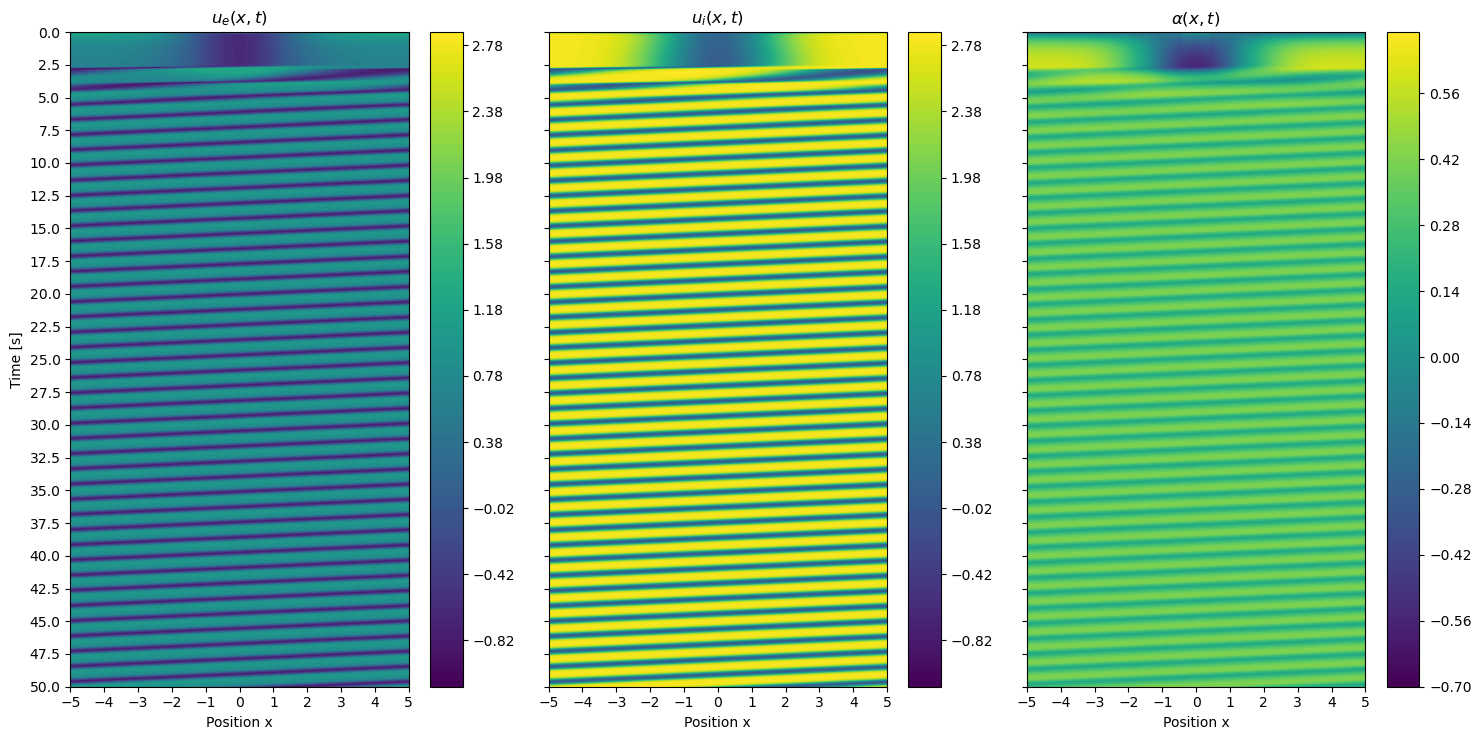

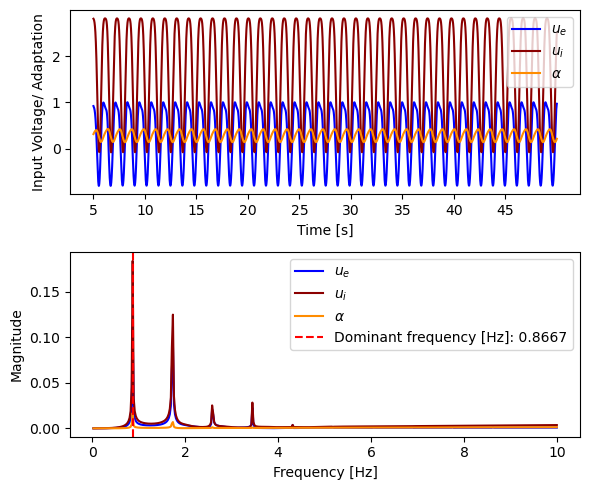

Type of Instability: ['Locally Unstable']
skipped

Type of Instability: ['Stable']
skipped

u_e max:  1.0003894318101716 u_e min:  -0.8038104975628761
u_i max:  2.8167857660501263 u_i min:  -0.08065230000035338


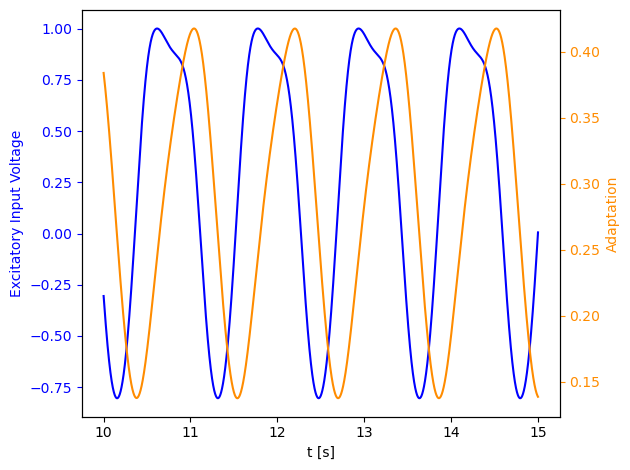

In [17]:
refresh()
param = parameterset

param["tau_e"] = 20
param["tau_i"] = 40
param["tau_alpha"] = 1200
param["g"] = 0.8

I_e = 1.2
I_i = 0.3

connectivity = 'gauss'
 
show_simulation(param=param,
                connectivity=connectivity,
                I_e=I_e,
                I_i=I_i
                )

### Exponential Connectivity

I_e:  1.2
I_i:  0.3
Time to get points of Equilibrium: 3.428
Time for classification: 2.641


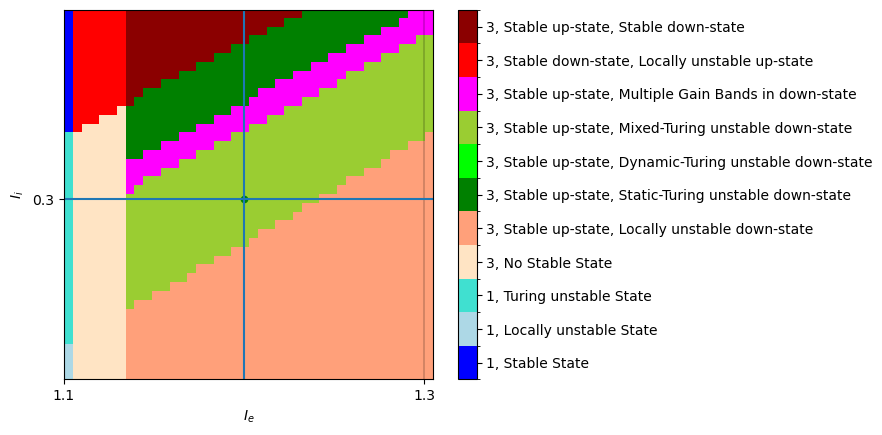

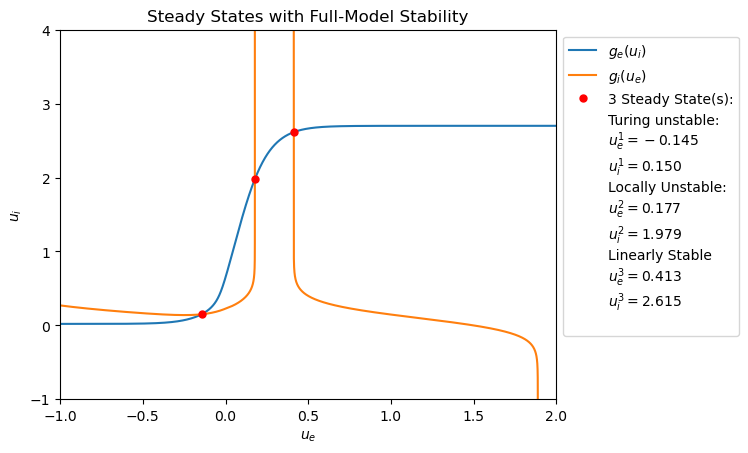

Type of Instability: ['Mixed Turing']
ue_0: -0.14517165906991966
ui_0: 0.1500627309089938
alpha: -0.14517165906991966


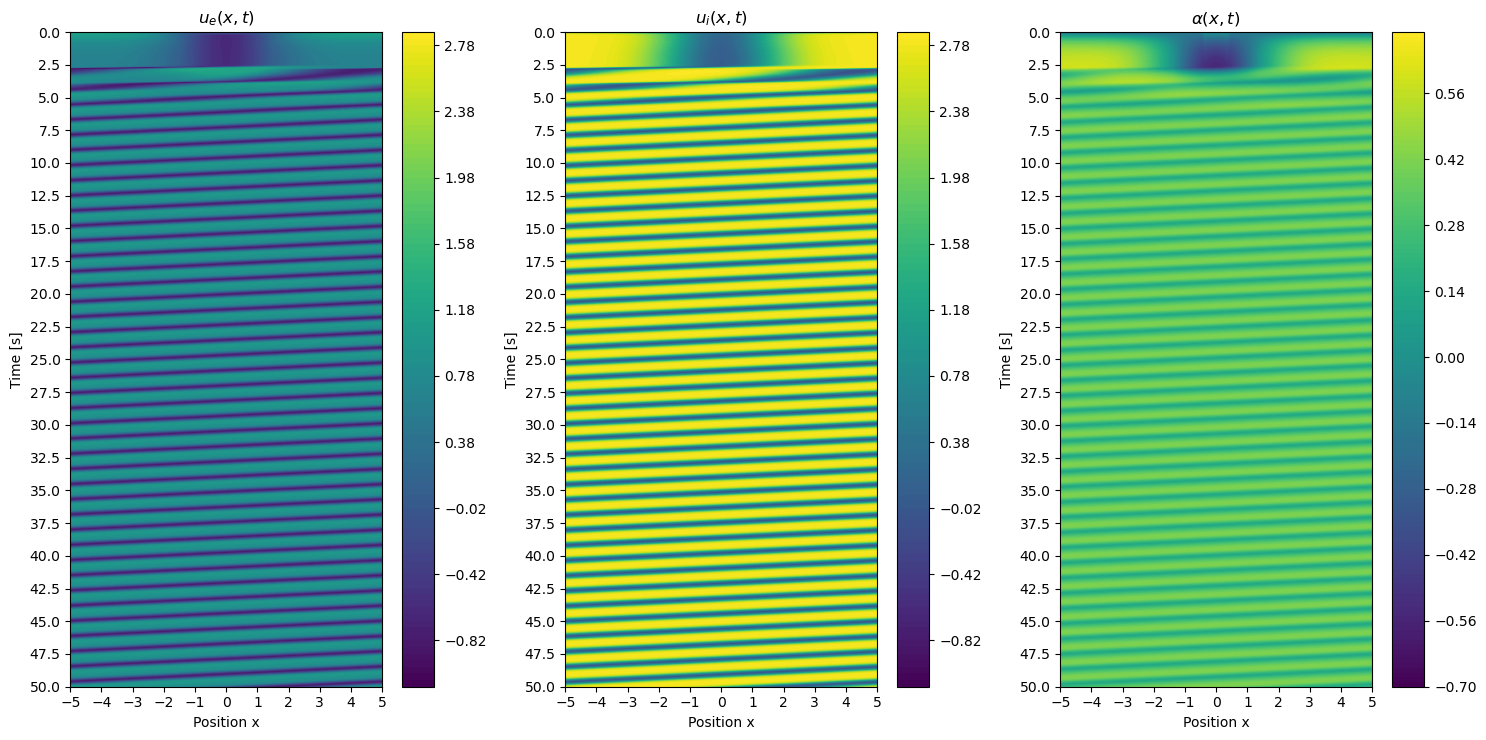

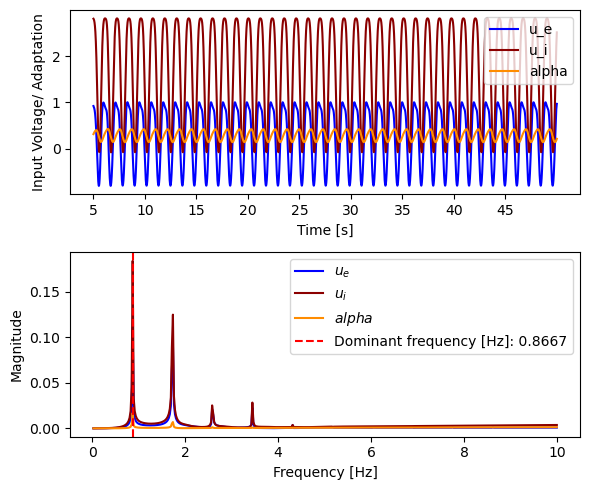

Type of Instability: ['Locally Unstable']
skipped

Type of Instability: ['Stable']
skipped

u_e max:  1.0003894223894247 u_e min:  -0.8038103923755512
u_i max:  2.8167857561266776 u_i min:  -0.08065204252413731


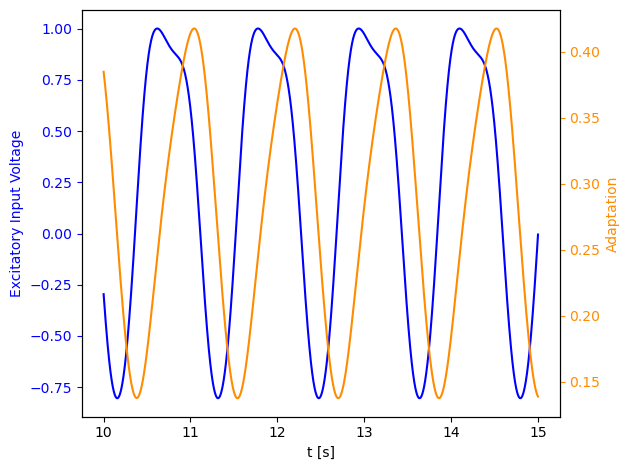

In [ ]:
refresh()
param = parameterset

param["tau_e"] = 20
param["tau_i"] = 40
param["tau_alpha"] = 1200
param["g"] = 0.8

I_e = 1.2
I_i = 0.3

show_simulation(param=param,
                connectivity=connectivity,
                I_e=I_e,
                I_i=I_i
                )

### Rectangular Connectivity

I_e:  1.2
I_i:  0.3
Time to get points of Equilibrium: 3.288
Time for classification: 2.633


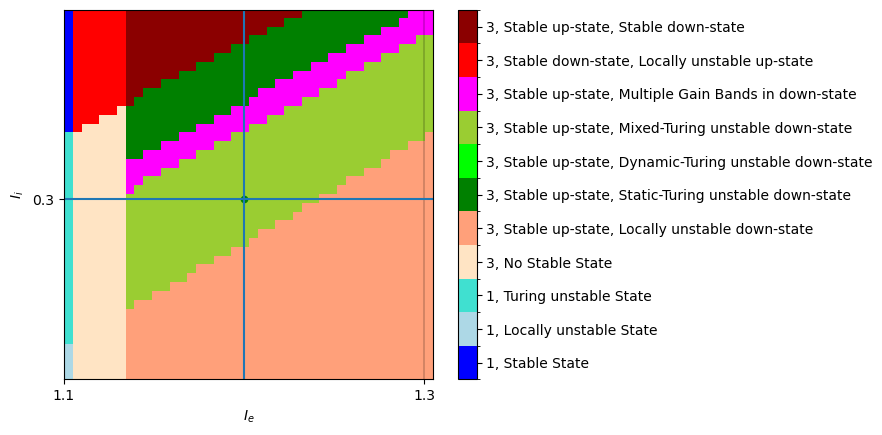

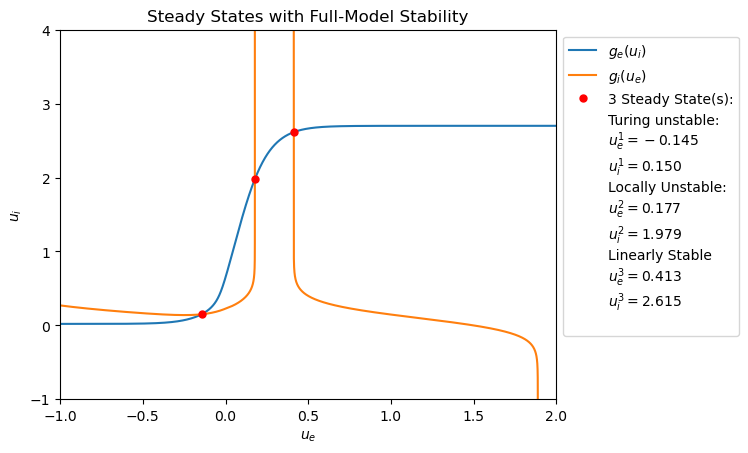

Type of Instability: ['Mixed Turing']
ue_0: -0.14517165906991303
ui_0: 0.15006273090899575
alpha: -0.14517165906991303


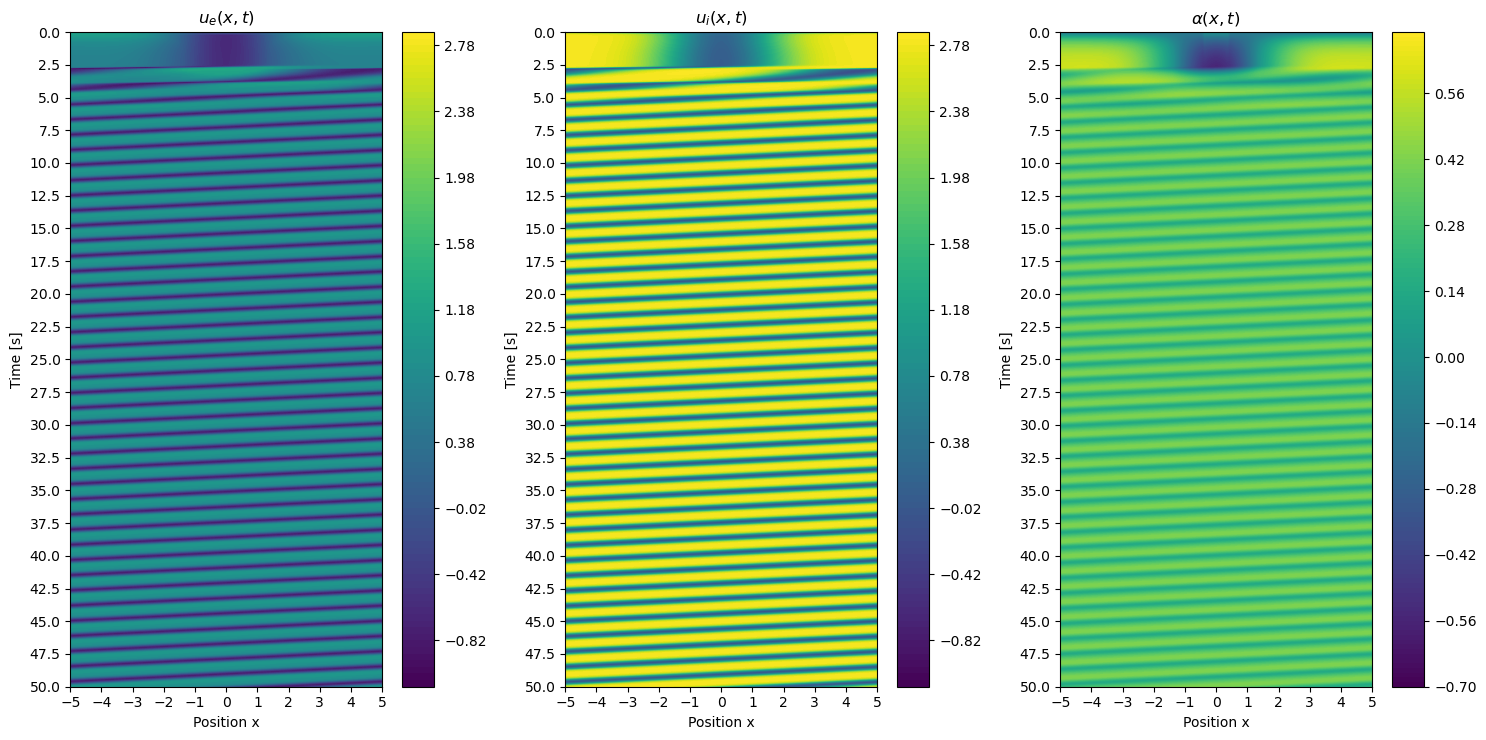

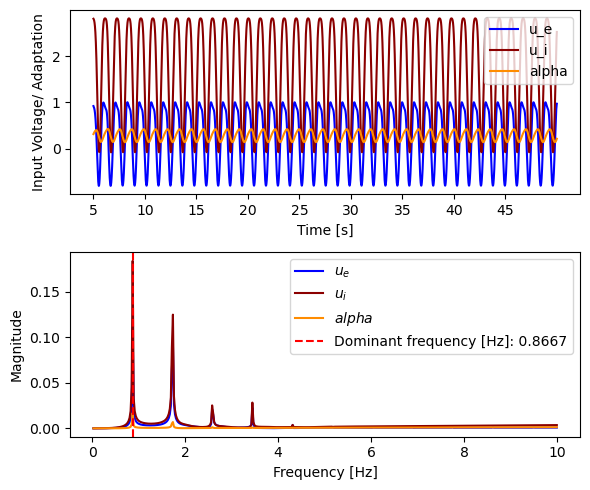

Type of Instability: ['Locally Unstable']
skipped

Type of Instability: ['Stable']
skipped

u_e max:  1.0003894381502283 u_e min:  -0.8038105110446463
u_i max:  2.8167857674025027 u_i min:  -0.08065231355383351


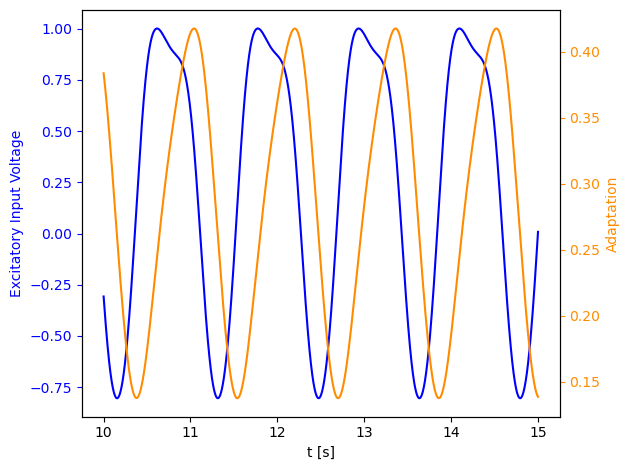

In [ ]:
refresh()
param = parameterset

param["tau_e"] = 20
param["tau_i"] = 40
param["tau_alpha"] = 1200
param["g"] = 0.8

I_e = 1.2
I_i = 0.3

show_simulation(param=param,
                connectivity=connectivity,
                I_e=I_e,
                I_i=I_i
                )

## Simulation without Adaptation

### Gaussian Connectivity

I_e:  0.92
I_i:  0.17
Time to get points of Equilibrium: 3.438
Time for classification: 2.892


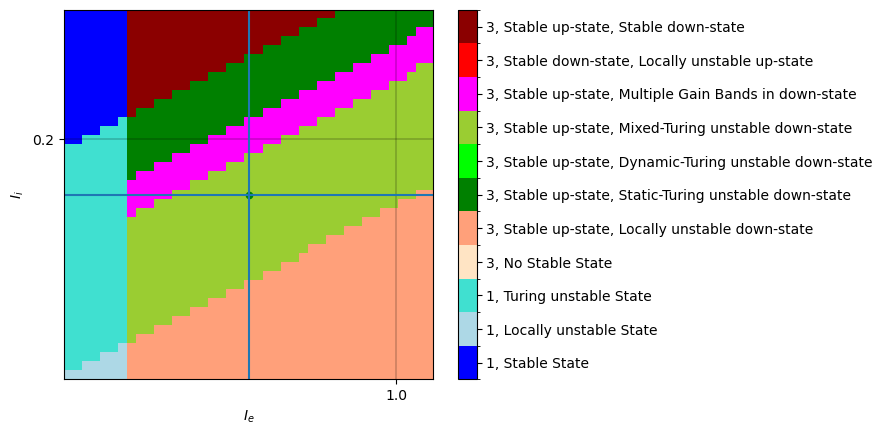

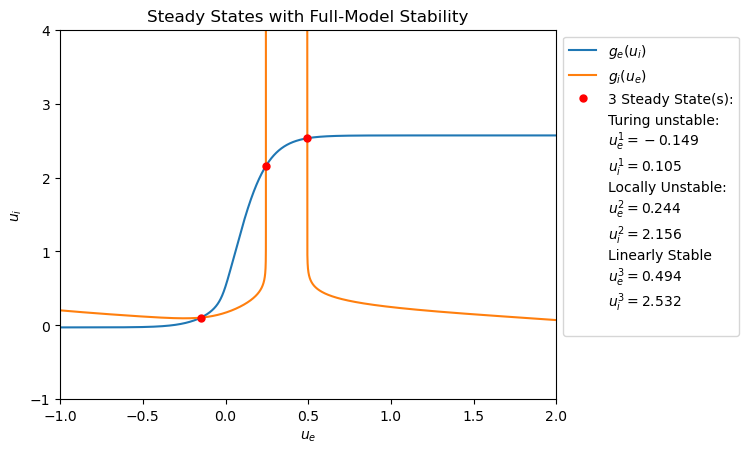

Type of Instability: ['Mixed Turing']
ue_0: -0.1490226197168229
ui_0: 0.10516038707342319
alpha: -0.1490226197168229


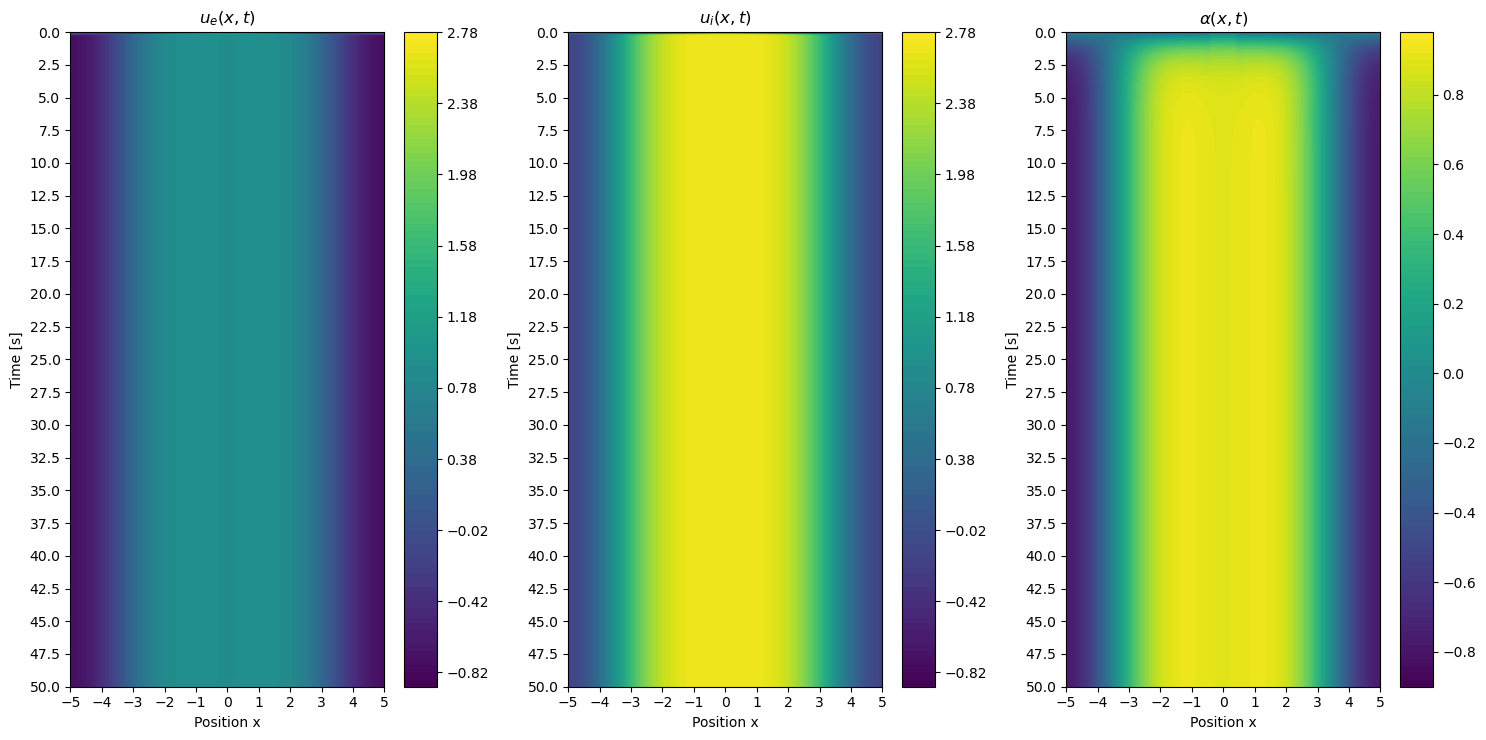

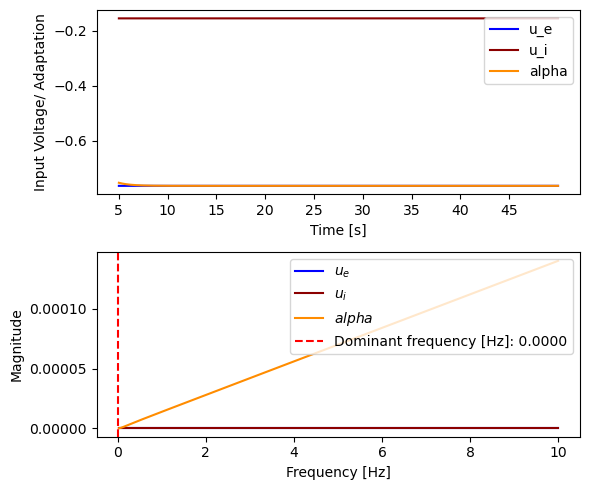

Type of Instability: ['Locally Unstable']
skipped

Type of Instability: ['Stable']
skipped

u_e max:  -0.7628490294193667 u_e min:  -0.7628490294193667
u_i max:  -0.15493053024289996 u_i min:  -0.15493053024289996


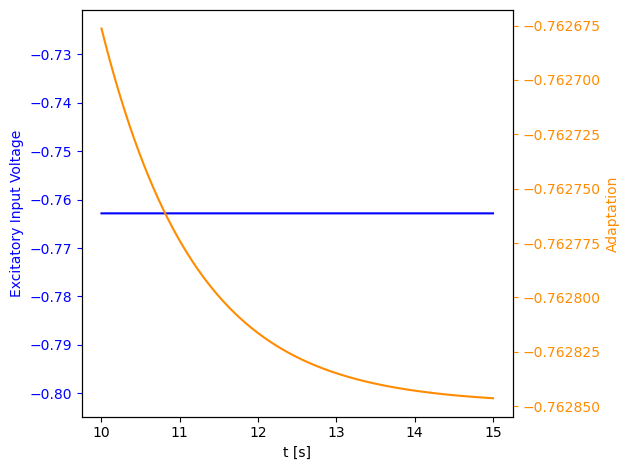

In [ ]:
refresh()
param = parameterset

param["tau_e"] = 20
param["tau_i"] = 40
param["tau_alpha"] = 1200
param["g"] = 0.

I_e = 0.92
I_i = 0.17

show_simulation(param=param,
                connectivity=connectivity,
                I_e=I_e,
                I_i=I_i
                )

### Rectangular Connectivity

I_e:  0.92
I_i:  0.17
Time to get points of Equilibrium: 3.402
Time for classification: 2.871


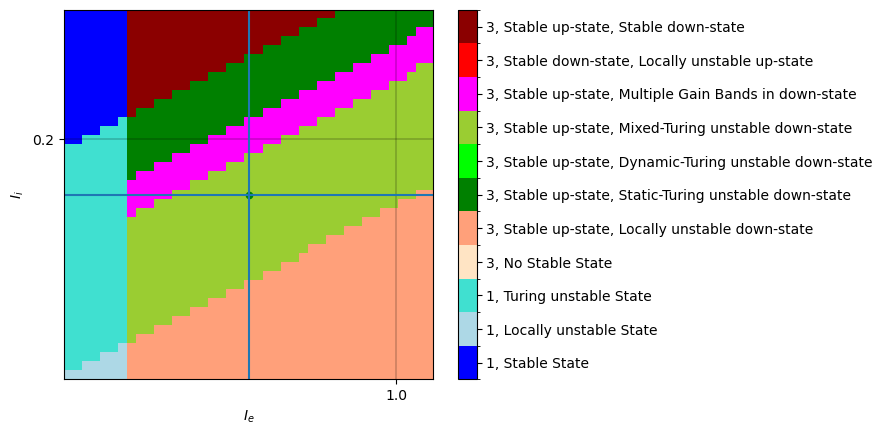

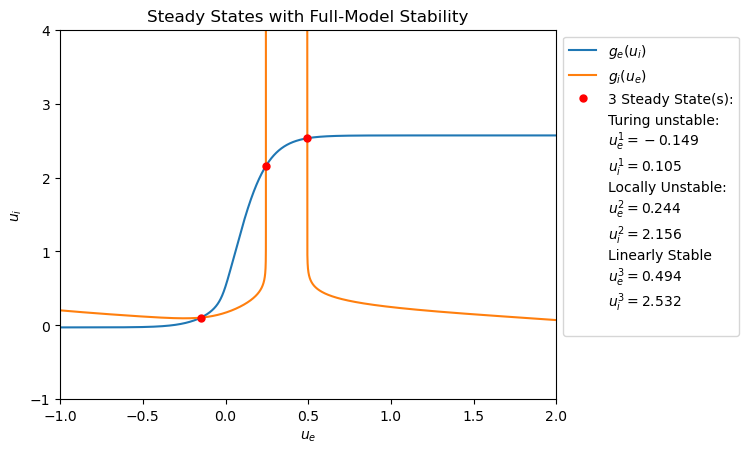

Type of Instability: ['Mixed Turing']
ue_0: -0.1490226197168229
ui_0: 0.10516038707342319
alpha: -0.1490226197168229


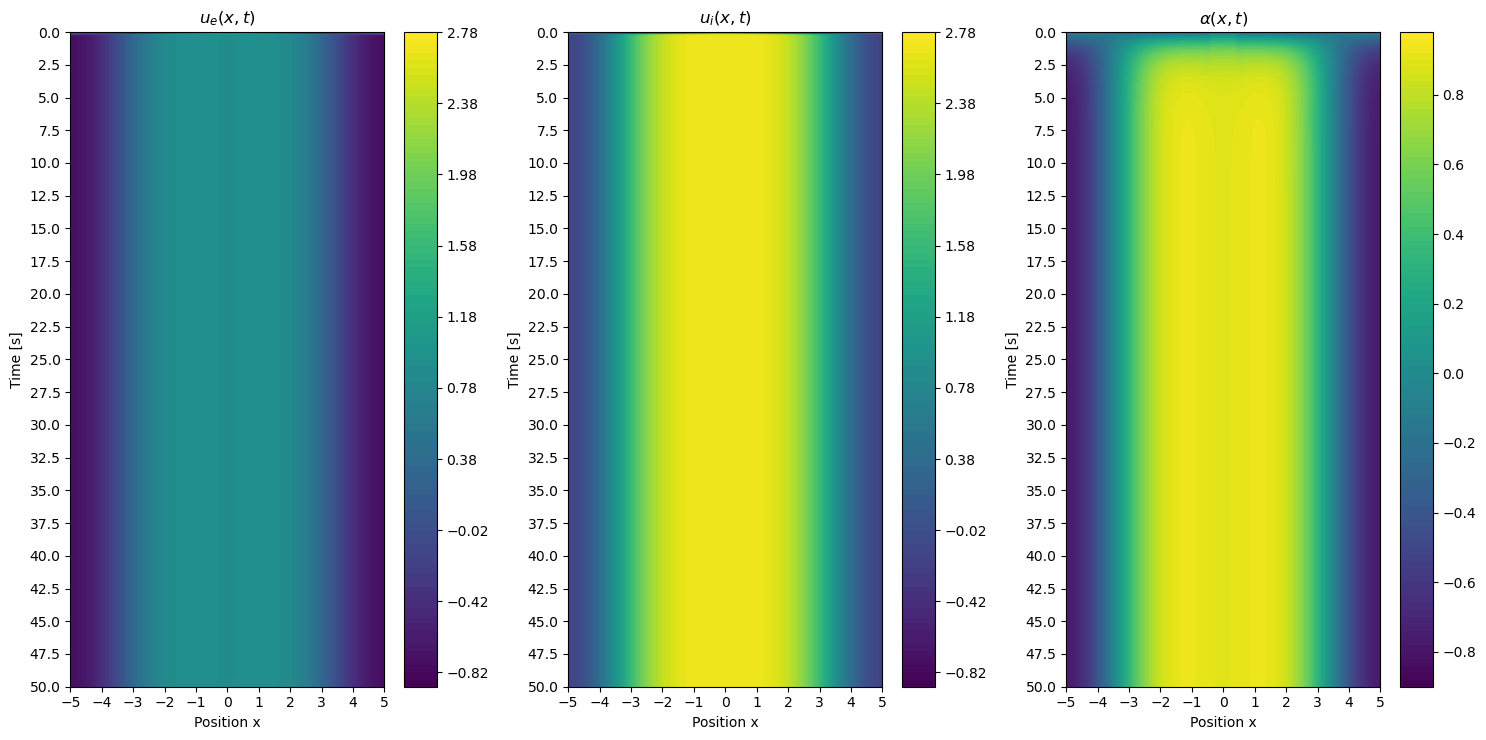

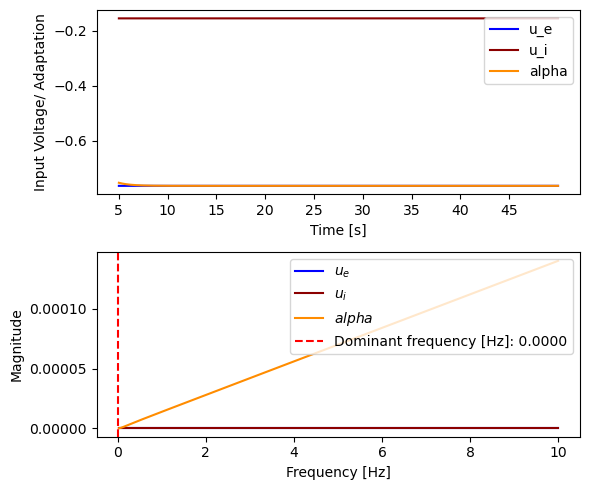

Type of Instability: ['Locally Unstable']
skipped

Type of Instability: ['Stable']
skipped

u_e max:  -0.7628490294193667 u_e min:  -0.7628490294193667
u_i max:  -0.15493053024289996 u_i min:  -0.15493053024289996


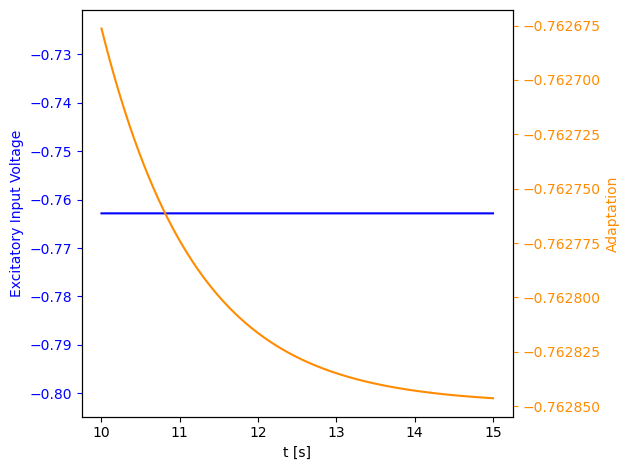

In [ ]:
refresh()
param = parameterset

param["tau_e"] = 20
param["tau_i"] = 40
param["tau_alpha"] = 1200
param["g"] = 0.

I_e = 0.92
I_i = 0.17

show_simulation(param=param,
                connectivity=connectivity,
                I_e=I_e,
                I_i=I_i
                )

# 6) Steady-State Trajectory, dependent on g

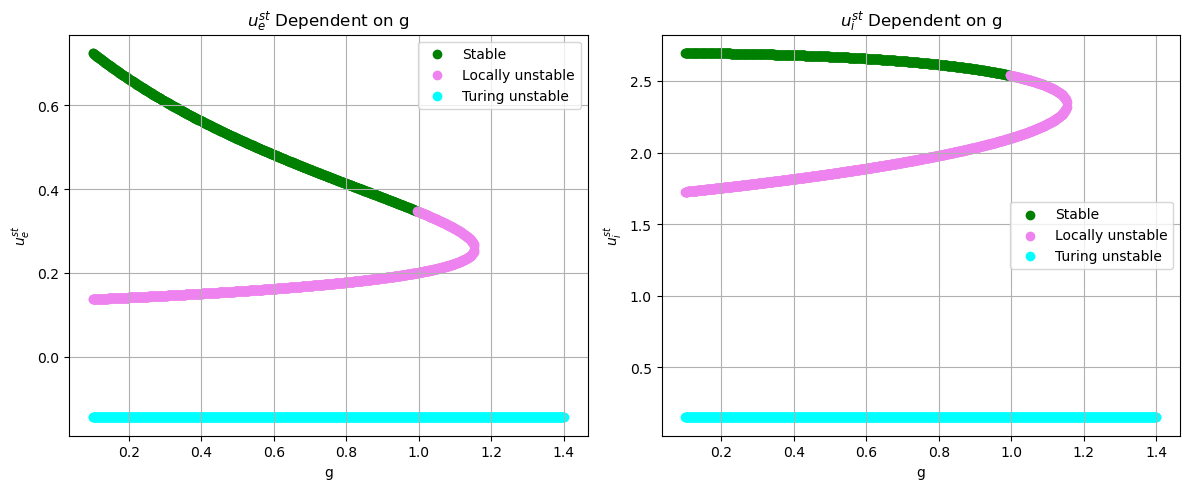

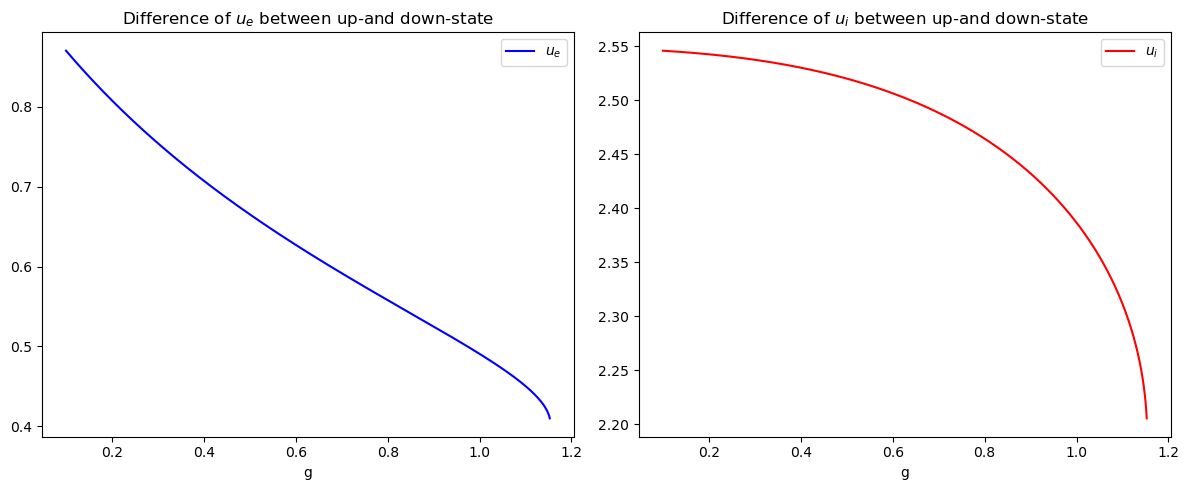

In [ ]:
refresh()
param = parameterset

param["tau_e"] = 20
param["tau_i"] = 40
param["tau_alpha"] = 1200
param["g"] = 0.8

I_e = 1.2
I_i = 0.3

wmn_hat = Adaptation.fourier_gaussian_connectivity
# wmn_hat = Adaptation.fourier_rectangular_connectivity
# wmn_hat = Adaptation.fourier_exponential_connectivity

Adaptation.plot_varying_parameter(param,
                                  varying_parameter="g",
                                  start=0.1,
                                  stop=1.4,
                                  I_i=I_i,
                                  I_e=I_e,
                                  points=1000,
                                  wmn_hat=wmn_hat,
                                  limit=4)

# 7) Adaptation Parameter Exploration

## Computation

In [183]:
def parameter_variation(
        param,
        name,
        I_e,
        I_i,
        variable,
        variable_start,
        variable_stop,
        steps,
        skip=True,
        connectivity='gauss',
        perturbation_type = 'box',
        perturbation_box_size = 0.4,
        perturbation_strength = 0.05,
        step_solver=Adaptation.spatial_adapt_Runge_Kutta,
        t_max = 25000,
        dt = 1e-1,
        t_start = 50,
        dx = 8e-2,
        I_range = 0.1,
        dI= 5e-3
        ):
    
    if connectivity == "exp":
        wmn = Adaptation.exponential_connectivity
        wmn_hat = Adaptation.fourier_exponential_connectivity
    elif connectivity == "gauss":
        wmn = Adaptation.gaussian_connectivity
        wmn_hat = Adaptation.fourier_gaussian_connectivity
    elif connectivity == "rect":
        wmn = Adaptation.rectangular_connectivity
        wmn_hat = Adaptation.fourier_rectangular_connectivity
    else:
        raise Exception("No valid Connectivity")
    
    limit_e = 4
    limit_i = 4

    ue_lim = (-limit_e, limit_e)
    ui_lim = (-limit_i, limit_i)

    x_min = -5
    x_max = 5

    x = np.arange(x_min, x_max + dx, dx)
    t = np.arange(0, t_max + dt, dt)
    if len(x)%2 != 0: x = x[:-1]

    print('I_e: ', I_e)
    print('I_i: ', I_i)
    print('Variable: ', variable)

    ue_eqs, ui_eqs = Adaptation.get_adapt_equilibrium_points(param,
                                                             I_e,
                                                             I_i,
                                                             improve_solution=True,
                                                             ue_lim=ue_lim,
                                                             ui_lim=ui_lim)
    print(ue_eqs)

    res = Adaptation.plot_I_plane(param=param,
                                  I_e_start=I_e - I_range,
                                  I_e_stop=I_e + I_range,
                                  dI_e=dI,
                                  I_i_start=I_i - I_range,
                                  I_i_stop=I_i + I_range,
                                  dI_i=dI,
                                  limit=limit_e,
                                  plot=True,
                                  wmn_hat=wmn_hat,
                                  print_times=True,
                                  return_res=False,
                                  show=False)
    plt.axhline(y=I_i)
    plt.axvline(x=I_e)
    plt.scatter(I_e, I_i, color="green", s=20)
    plt.show()
    
    variable_list = np.linspace(variable_start, variable_stop, steps)
    frequency_list = np.zeros_like(variable_list)
    amplitude_list_e = np.zeros_like(variable_list)
    amplitude_list_i = np.zeros_like(variable_list)
    amplitude_list_alpha = np.zeros_like(variable_list)
    
    result = {
        "variable": variable,
        "variable_values": variable_list,
        'frequencies': frequency_list,
        'amplitude_e': amplitude_list_e,
        'amplitude_i': amplitude_list_i,
        'amplitude_alpha': amplitude_list_alpha
    }

    with h5py.File(name, 'a') as f:

        check_calculated_values = False
        if "variable_values" in f:
            if (result["variable_values"] == np.array(f["variable_values"][()]) ).all():
                check_calculated_values = True
        if check_calculated_values == False:
            for key, value in result.items():
                if key in f:
                    del f[key]
                f.create_dataset(key, data=value)

        for idx, variable_value in enumerate(variable_list):
            if float(f["frequencies"][idx]) == 0.0:
                param[variable] = variable_value
                print()
                print(variable, " = ", variable_value)
                print(idx + 1, ' / ', len(variable_list))
                ue_eqs, ui_eqs = Adaptation.get_adapt_equilibrium_points(param,
                                                                         I_e,
                                                                         I_i,
                                                                         improve_solution=True,
                                                                         ue_lim=ue_lim,
                                                                         ui_lim=ui_lim)
                
                for j, (ue_eq, ui_eq) in enumerate(zip(ue_eqs, ui_eqs)):
                    # if j != 2:
                    #     continue
                    stability = Adaptation.type_of_instability(param=param, ue_eq=ue_eq, ui_eq=ui_eq, wmn_hat=wmn_hat)
                    if skip:
                        if stability == ['Locally Unstable'] or stability == ['Stable']:
                            # print('skipped')
                            # print()
                            continue
                    print(f"Type of Instability: {stability}")

                    ue_0 = np.zeros((len(x),))
                    ui_0 = np.zeros((len(x),))
                    alpha0 = np.zeros((len(x),))

                    ue_0 += ue_eq
                    ui_0 += ui_eq
                    alpha0 += ue_eq

                    # Pertubation
                    if perturbation_type == "box":
                        mask = abs(x) <= perturbation_box_size
                        ue_0[mask] += perturbation_strength
                        ui_0[mask] += perturbation_strength
                        alpha0[mask] += perturbation_strength

                    elif perturbation_type == "random":
                        np.random.seed(42)
                        pert1 = (2 * np.random.rand(len(x), ) - 1) * perturbation_strength
                        pert2 = (2 * np.random.rand(len(x), ) - 1) * perturbation_strength
                        pert3 = (2 * np.random.rand(len(x), ) - 1) * perturbation_strength
                        ue_0 += pert1
                        ui_0 += pert2
                        alpha0 += pert3
                    else:
                        raise Exception('No valid perturbation given')

                    stability = Adaptation.type_of_instability(param=param, ue_eq=ue_eq, ui_eq=ui_eq, wmn_hat=wmn_hat)
                    print(f"ue_0: {ue_eq}")
                    print(f"ui_0: {ui_eq}")
                    print(f"alpha: {ue_eq}")
                    
                    u_e, u_i, alpha = Adaptation.spatial_adapt_num_solver(ue_0=ue_0, ui_0=ui_0, alpha0=alpha0,
                                                                         I_e=I_e, I_i=I_i,
                                                                         x=x, t=t,
                                                                         w=wmn,
                                                                         param=param,
                                                                         fft=True,
                                                                         spatial_step_solver=step_solver)
                    Adaptation.plot_first_node(t=t, u_e=u_e, u_i=u_i, alpha=alpha, t_start=t_start, cutoff_frequency = 8)
                    t_new = t/1000
                    mask = np.where((t_new >= t_start))
                    t_new = t_new[mask]
                    ue_first = u_e[0, :][mask]
                    frequency_list[idx] = Adaptation.frequency_zero_crossing(ue_first, t_new)
                    t_start_amp = np.max(t_new) - 20
                    mask = np.where((t_new >= t_start_amp))
                    t_new = t_new[mask]
                    ui_first = u_i[0, :][mask]
                    alpha_first = alpha[0, :][mask]
                    amplitude_list_e[idx] = np.max(ue_first) - np.min(ue_first)
                    amplitude_list_i[idx] = np.max(ui_first) - np.min(ui_first)
                    amplitude_list_alpha[idx] = np.max(alpha_first) - np.min(alpha_first)

                    f['frequencies'][idx] = frequency_list[idx]
                    f['amplitude_e'][idx] = amplitude_list_e[idx]
                    f['amplitude_i'][idx] = amplitude_list_i[idx]
                    f['amplitude_alpha'][idx] = amplitude_list_alpha[idx]

                    print("Frequency: ", frequency_list[idx])
                    print("Amplitude: ", amplitude_list_e[idx])
            else:
                print("Skipped, already run")
                print("frequency: ", f["frequencies"][idx])
    return result

### Adaptation Strength

I_e:  1.2
I_i:  0.3
Variable:  g
[-0.14517166  0.17749262  0.41281642]
Time to get points of Equilibrium: 3.483
Time for classification: 2.725


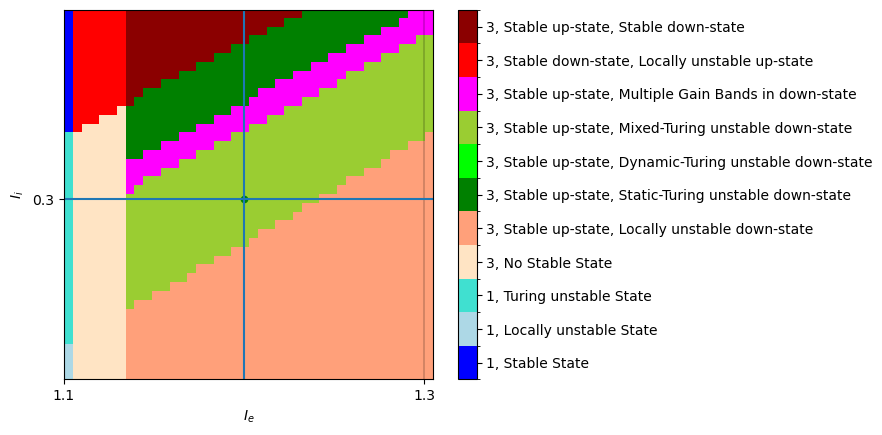

Skipped, already run
frequency:  0.23125
Skipped, already run
frequency:  0.25
Skipped, already run
frequency:  0.2625
Skipped, already run
frequency:  0.275
Skipped, already run
frequency:  0.2875
Skipped, already run
frequency:  0.29375
Skipped, already run
frequency:  0.3125
Skipped, already run
frequency:  0.325
Skipped, already run
frequency:  0.3375
Skipped, already run
frequency:  0.35
Skipped, already run
frequency:  0.35625
Skipped, already run
frequency:  0.3625
Skipped, already run
frequency:  0.375
Skipped, already run
frequency:  0.3875
Skipped, already run
frequency:  0.39375
Skipped, already run
frequency:  0.40625
Skipped, already run
frequency:  0.4125
Skipped, already run
frequency:  0.425
Skipped, already run
frequency:  0.4375
Skipped, already run
frequency:  0.44375
Skipped, already run
frequency:  0.45625
Skipped, already run
frequency:  0.4625
Skipped, already run
frequency:  0.475
Skipped, already run
frequency:  0.4875
Skipped, already run
frequency:  0.49375
S

In [184]:
refresh()
param = parameterset

param["tau_e"] = 20
param["tau_i"] = 40
param["tau_alpha"] = 1200
param["g"] = 0.8

I_e = 1.2
I_i = 0.3

perturbation_type = 'random'
# perturbation_type = 'box'
perturbation_box_size = 0.4
perturbation_strength = 0.01

connectivity = 'gauss'

dt=2e-1
t_max=100e3
t_start = 20

variable = 'g'
variable_start=0.1
variable_stop=1.05
steps=100

name = 'Simulation_Data/gauss_result_g'
gauss_result_g = parameter_variation(
                              param=param,
                              name=name,
                              I_e=I_e,
                              I_i=I_i,
                              variable=variable,
                              variable_start=variable_start,
                              connectivity=connectivity,
                              perturbation_type=perturbation_type,
                              perturbation_strength=perturbation_strength,
                              perturbation_box_size=perturbation_box_size,
                              variable_stop=variable_stop,
                              steps=steps,
                              t_max=t_max,
                              t_start=t_start,
                              dt=dt,
                              )

I_e:  1.2
I_i:  0.3
Variable:  g
[-0.14517166  0.17749262  0.41281642]


/Users/felixstoffregen/Library/Mobile Documents/com~apple~CloudDocs/Studium/Master/Masterarbeit/Neural_Field_Model/Adaptation_Functions/A0Basic_Functions.py:88: RuntimeWarning: invalid value encountered in divide
  result = np.where(np.isnan(result), 1, result)  # Handle NaN values from previous step
/Users/felixstoffregen/Library/Mobile Documents/com~apple~CloudDocs/Studium/Master/Masterarbeit/Neural_Field_Model/Adaptation_Functions/A0Basic_Functions.py:88: RuntimeWarning: invalid value encountered in scalar divide
  result = np.where(np.isnan(result), 1, result)  # Handle NaN values from previous step


Time to get points of Equilibrium: 3.392
Time for classification: 6.363


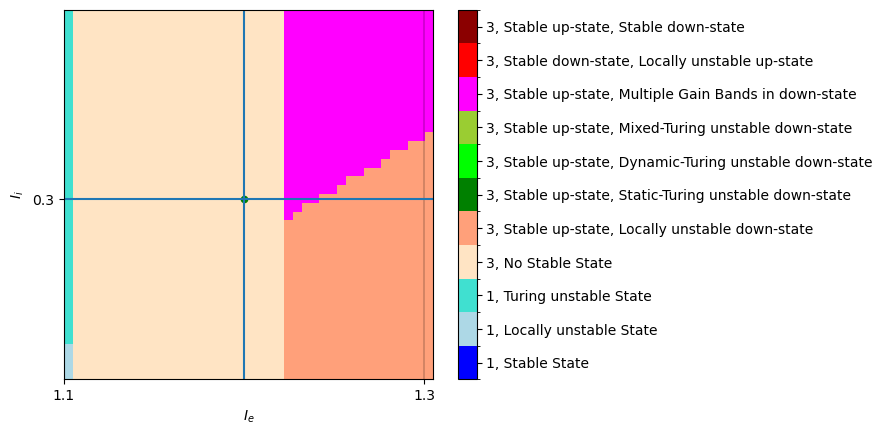

Skipped, already run
frequency:  0.2875
Skipped, already run
frequency:  0.30625
Skipped, already run
frequency:  0.325
Skipped, already run
frequency:  0.3375
Skipped, already run
frequency:  0.3625
Skipped, already run
frequency:  0.375
Skipped, already run
frequency:  0.39375
Skipped, already run
frequency:  0.4125
Skipped, already run
frequency:  0.425
Skipped, already run
frequency:  0.44375
Skipped, already run
frequency:  0.45625
Skipped, already run
frequency:  0.46875
Skipped, already run
frequency:  0.48125
Skipped, already run
frequency:  0.5
Skipped, already run
frequency:  0.5125
Skipped, already run
frequency:  0.525
Skipped, already run
frequency:  0.5375
Skipped, already run
frequency:  0.55
Skipped, already run
frequency:  0.55625
Skipped, already run
frequency:  0.575
Skipped, already run
frequency:  0.58125
Skipped, already run
frequency:  0.59375
Skipped, already run
frequency:  0.60625
Skipped, already run
frequency:  0.6125
Skipped, already run
frequency:  0.625
S

In [185]:
refresh()
param = parameterset

param["tau_e"] = 20
param["tau_i"] = 40
param["tau_alpha"] = 1200
param["g"] = 0.8

I_e = 1.2
I_i = 0.3

perturbation_type = 'random'
# perturbation_type = 'box'
perturbation_box_size = 0.4
perturbation_strength = 0.01

connectivity = 'rect'

dt=2e-1
t_max=100e3
t_start = 20

variable = 'g'
variable_start=0.1
variable_stop=1.05
steps=100

name = 'Simulation_Data/rect_result_g'
gauss_result_g = parameter_variation(
                              param=param,
                              name=name,
                              I_e=I_e,
                              I_i=I_i,
                              variable=variable,
                              variable_start=variable_start,
                              connectivity=connectivity,
                              perturbation_type=perturbation_type,
                              perturbation_strength=perturbation_strength,
                              perturbation_box_size=perturbation_box_size,
                              variable_stop=variable_stop,
                              steps=steps,
                              t_max=t_max,
                              t_start=t_start,
                              dt=dt,
                              )

### Adaptation Timeconstant

I_e:  1.2
I_i:  0.3
Variable:  tau_alpha
[-0.14517166  0.17749262  0.41281642]
Time to get points of Equilibrium: 3.508
Time for classification: 2.718


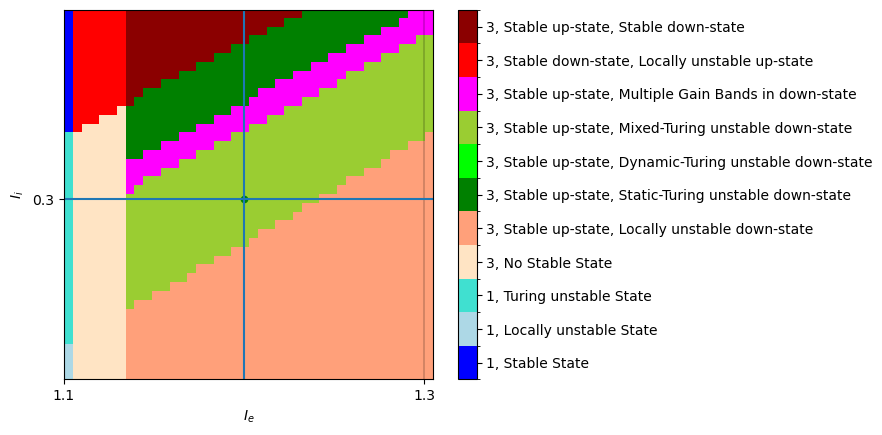

Skipped, already run
frequency:  1.05625
Skipped, already run
frequency:  1.04375
Skipped, already run
frequency:  1.025
Skipped, already run
frequency:  1.0125
Skipped, already run
frequency:  1.00625
Skipped, already run
frequency:  0.9875
Skipped, already run
frequency:  0.975
Skipped, already run
frequency:  0.96875
Skipped, already run
frequency:  0.95
Skipped, already run
frequency:  0.94375
Skipped, already run
frequency:  0.93125
Skipped, already run
frequency:  0.925
Skipped, already run
frequency:  0.9125
Skipped, already run
frequency:  0.9
Skipped, already run
frequency:  0.9
Skipped, already run
frequency:  0.8875
Skipped, already run
frequency:  0.875
Skipped, already run
frequency:  0.86875
Skipped, already run
frequency:  0.8625
Skipped, already run
frequency:  0.85625
Skipped, already run
frequency:  0.85
Skipped, already run
frequency:  0.8375
Skipped, already run
frequency:  0.83125
Skipped, already run
frequency:  0.825
Skipped, already run
frequency:  0.81875
Skipp

In [186]:
refresh()
param = parameterset

param["tau_e"] = 20
param["tau_i"] = 40
param["tau_alpha"] = 1200
param["g"] = 0.8

I_e = 1.2
I_i = 0.3

perturbation_type = 'random'
# perturbation_type = 'box'
perturbation_box_size = 0.4
perturbation_strength = 0.01

connectivity = 'gauss'

dt=2e-1
t_max=100e3
t_start = 20

variable = 'tau_alpha'
variable_start=800
variable_stop=3000
steps=100

name = 'Simulation_Data/gauss_result_tau_alpha'
gauss_result_tau_alpha = parameter_variation(
                              param=param,
                              name=name,
                              I_e=I_e,
                              I_i=I_i,
                              variable=variable,
                              variable_start=variable_start,
                              connectivity=connectivity,
                              perturbation_type=perturbation_type,
                              perturbation_strength=perturbation_strength,
                              perturbation_box_size=perturbation_box_size,
                              variable_stop=variable_stop,
                              steps=steps,
                              t_max=t_max,
                              t_start=t_start,
                              dt=dt,
                              )

I_e:  1.2
I_i:  0.3
Variable:  tau_alpha
[-0.14517166  0.17749262  0.41281642]


/Users/felixstoffregen/Library/Mobile Documents/com~apple~CloudDocs/Studium/Master/Masterarbeit/Neural_Field_Model/Adaptation_Functions/A0Basic_Functions.py:88: RuntimeWarning: invalid value encountered in divide
  result = np.where(np.isnan(result), 1, result)  # Handle NaN values from previous step
/Users/felixstoffregen/Library/Mobile Documents/com~apple~CloudDocs/Studium/Master/Masterarbeit/Neural_Field_Model/Adaptation_Functions/A0Basic_Functions.py:88: RuntimeWarning: invalid value encountered in scalar divide
  result = np.where(np.isnan(result), 1, result)  # Handle NaN values from previous step


Time to get points of Equilibrium: 3.643
Time for classification: 6.459


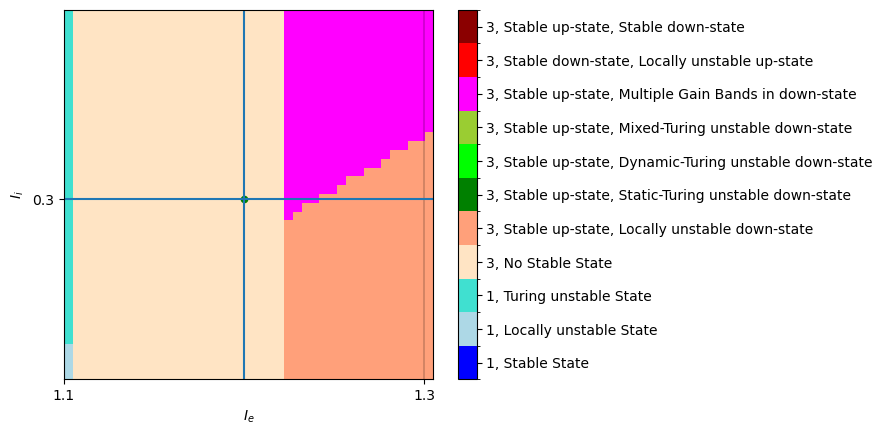

Skipped, already run
frequency:  1.075
Skipped, already run
frequency:  1.0625
Skipped, already run
frequency:  1.0625
Skipped, already run
frequency:  1.05
Skipped, already run
frequency:  1.04375
Skipped, already run
frequency:  1.04375
Skipped, already run
frequency:  1.03125
Skipped, already run
frequency:  1.025
Skipped, already run
frequency:  1.025
Skipped, already run
frequency:  1.0125
Skipped, already run
frequency:  1.00625
Skipped, already run
frequency:  1.00625
Skipped, already run
frequency:  1.0
Skipped, already run
frequency:  0.99375
Skipped, already run
frequency:  0.98125
Skipped, already run
frequency:  0.98125
Skipped, already run
frequency:  0.975
Skipped, already run
frequency:  0.9625
Skipped, already run
frequency:  0.9625
Skipped, already run
frequency:  0.95
Skipped, already run
frequency:  0.9375
Skipped, already run
frequency:  0.9375
Skipped, already run
frequency:  0.925
Skipped, already run
frequency:  0.91875
Skipped, already run
frequency:  0.9125
Ski

In [187]:
refresh()
param = parameterset

param["tau_e"] = 20
param["tau_i"] = 40
param["tau_alpha"] = 1200
param["g"] = 0.8

I_e = 1.2
I_i = 0.3

perturbation_type = 'random'
# perturbation_type = 'box'
perturbation_box_size = 0.4
perturbation_strength = 0.01

connectivity = 'rect'

dt=2e-1
t_max=100e3
t_start = 20

variable = 'tau_alpha'
variable_start=800
variable_stop=3000
steps=100

name = 'Simulation_Data/rect_result_tau_alpha'
gauss_result_tau_alpha = parameter_variation(
                              param=param,
                              name=name,
                              I_e=I_e,
                              I_i=I_i,
                              variable=variable,
                              variable_start=variable_start,
                              connectivity=connectivity,
                              perturbation_type=perturbation_type,
                              perturbation_strength=perturbation_strength,
                              perturbation_box_size=perturbation_box_size,
                              variable_stop=variable_stop,
                              steps=steps,
                              t_max=t_max,
                              t_start=t_start,
                              dt=dt,
                              )

## Plots

### Adaptation Strength

Gaussian Connectivity
amplitude_alpha start:  0.8382750969678641
amplitude_alpha stop:  0.23881951807785523
frequency start:  0.23125
frequency stop:  1.03125



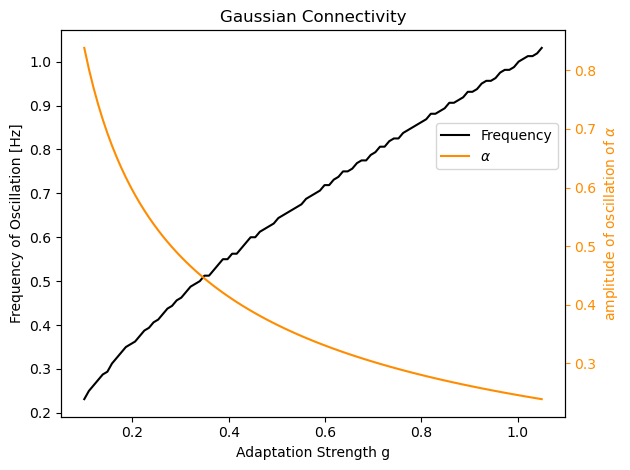

Rectangular Connectivity
amplitude_alpha start:  0.9544083364199867
amplitude_alpha stop:  0.2844928456384506
frequency start:  0.2875
frequency stop:  1.075



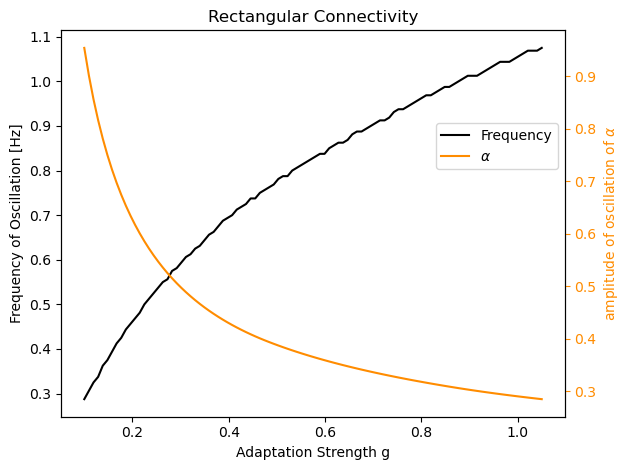

In [188]:
name = 'Simulation_Data/gauss_result_g'
res = {}
with h5py.File(name, 'r') as f:
    for key in f:
        res[key] = f[key][()]
res['variable'] = res['variable'].decode('utf-8')

color_alpha = "darkorange"

print("Gaussian Connectivity")
print("amplitude_alpha start: ",res['amplitude_alpha'][0])
print("amplitude_alpha stop: ",res['amplitude_alpha'][-1])
print("frequency start: ",res['frequencies'][0])
print("frequency stop: ",res['frequencies'][-1])
print()

# Plot Frequency and alpha_amplitude
fig, ax1 = plt.subplots(1, 1)

# Create a second y-axis for the alpha
ax1.plot(res["variable_values"], res["frequencies"], label='Frequency [Hz]', color="black")
ax1.set_ylabel('Frequency of Oscillation [Hz]')
ax1.set_xlabel('Adaptation Strength g')
ax1.set_title('Gaussian Connectivity')

# Create a second y-axis for the alpha
ax2 = ax1.twinx()
ax2.plot(res['variable_values'], res['amplitude_alpha'], color=color_alpha, label=r"$\alpha$")
ax2.set_ylabel(r'Amplitude of Oscillation of $\alpha$',  color=color_alpha)
ax2.tick_params('y',  colors=color_alpha)

fig.legend(loc="center right", bbox_to_anchor=(1,0.7), bbox_transform=ax1.transAxes)
fig.tight_layout()
plt.show()

#######################################################################################################################

name = 'Simulation_Data/rect_result_g'
res = {}
with h5py.File(name, 'r') as f:
    for key in f:
        res[key] = f[key][()]
res['variable'] = res['variable'].decode('utf-8')

print("Rectangular Connectivity")
print("amplitude_alpha start: ",res['amplitude_alpha'][0])
print("amplitude_alpha stop: ",res['amplitude_alpha'][-1])
print("frequency start: ",res['frequencies'][0])
print("frequency stop: ",res['frequencies'][-1])
print()

fig, ax1 = plt.subplots(1, 1)

# Create a second y-axis for the alpha
ax1.plot(res["variable_values"], res["frequencies"], label='Frequency [Hz]', color="black")
ax1.set_ylabel('Frequency of Oscillation [Hz]')
ax1.set_xlabel('Adaptation Strength g')
ax1.set_title('Rectangular Connectivity')

# Create a second y-axis for the alpha
ax2 = ax1.twinx()
ax2.plot(res['variable_values'], res['amplitude_alpha'], color=color_alpha, label=r"$\alpha$")
ax2.set_ylabel(r'Amplitude of Oscillation of $\alpha$',  color=color_alpha)
ax2.tick_params('y',  colors=color_alpha)

fig.legend(loc="center right", bbox_to_anchor=(1,0.7), bbox_transform=ax1.transAxes)
fig.tight_layout()
plt.show()


Gaussian Connectivity
amplitude_e start:  1.7085941041928852
amplitude_e stop:  1.8149196164026482
amplitude_i start:  2.704615149555352
amplitude_i stop:  2.9150372969820686



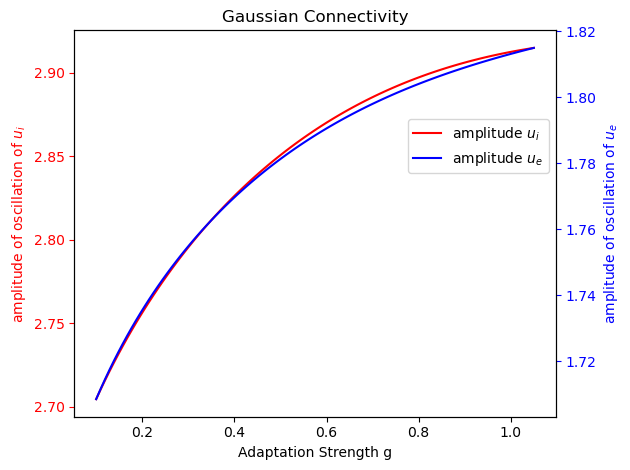

Rectangular Connectivity
amplitude_e start:  2.455467829049822
amplitude_e stop:  2.5097909250355785
amplitude_i start:  3.323627445316398
amplitude_i max:  3.331014524953985
amplitude_i stop:  3.2821408537774652



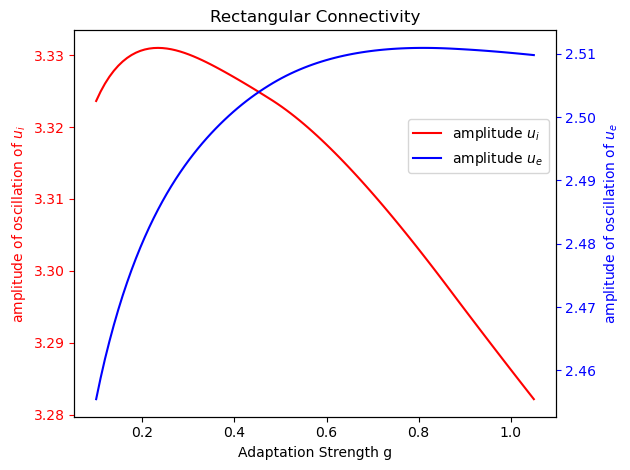

In [189]:
name = 'Simulation_Data/gauss_result_g'
res = {}
with h5py.File(name, 'r') as f:
    for key in f:
        res[key] = f[key][()]
res['variable'] = res['variable'].decode('utf-8')

color_alpha = "darkorange"
color_e = "blue"
color_i = "red"

print("Gaussian Connectivity")
print("amplitude_e start: ",res['amplitude_e'][0])
print("amplitude_e stop: ",res['amplitude_e'][-1])
print("amplitude_i start: ",res['amplitude_i'][0])
print("amplitude_i stop: ",res['amplitude_i'][-1])
print()

# Plot Frequency and alpha_amplitude
fig, ax1 = plt.subplots(1, 1)

# Create a second y-axis for the alpha
ax1.plot(res['variable_values'], res['amplitude_i'], color=color_i, label=r"amplitude $u_i$")
ax1.set_ylabel(r'Amplitude of Oscillation of $u_i$',  color=color_i)
ax1.set_xlabel('Adaptation Strength g')
ax1.set_title('Gaussian Connectivity')
ax1.tick_params('y',  colors=color_i)

# Create a second y-axis for the alpha
ax2 = ax1.twinx()
ax2.plot(res['variable_values'], res['amplitude_e'], color=color_e, label=r"amplitude $u_e$")
ax2.set_ylabel(r'Amplitude of Oscillation of $u_e$',  color=color_e)
ax2.tick_params('y',  colors=color_e)

fig.legend(loc="center right", bbox_to_anchor=(1,0.7), bbox_transform=ax1.transAxes)
fig.tight_layout()
plt.show()

#######################################################################################################################

name = 'Simulation_Data/rect_result_g'
res = {}
with h5py.File(name, 'r') as f:
    for key in f:
        res[key] = f[key][()]
res['variable'] = res['variable'].decode('utf-8')

color_alpha = "darkorange"
color_e = "blue"
color_i = "red"

print("Rectangular Connectivity")
print("amplitude_e start: ",res['amplitude_e'][0])
print("amplitude_e stop: ",res['amplitude_e'][-1])
print("amplitude_i start: ",res['amplitude_i'][0])
print("amplitude_i max: ",np.max(res['amplitude_i']))
print("amplitude_i stop: ",res['amplitude_i'][-1])
print()

# Plot Frequency and alpha_amplitude
fig, ax1 = plt.subplots(1, 1)

# Create a second y-axis for the alpha
ax1.plot(res['variable_values'], res['amplitude_i'], color=color_i, label=r"amplitude $u_i$")
ax1.set_ylabel(r'Amplitude of Oscillation of $u_i$',  color=color_i)
ax1.set_xlabel('Adaptation Strength g')
ax1.tick_params('y',  colors=color_i)
ax1.set_title('Rectangular Connectivity')

# Create a second y-axis for the alpha
ax2 = ax1.twinx()
ax2.plot(res['variable_values'], res['amplitude_e'], color=color_e, label=r"amplitude $u_e$")
ax2.set_ylabel(r'Amplitude of Oscillation of $u_e$',  color=color_e)
ax2.tick_params('y',  colors=color_e)

fig.legend(loc="center right", bbox_to_anchor=(1,0.7), bbox_transform=ax1.transAxes)
fig.tight_layout()
plt.show()

### Adaptation Timeconstant

Gaussian Connectivity
amplitude_alpha start:  0.3404779429373223
amplitude_alpha stop:  0.17886230387204746
frequency start:  1.05625
frequency stop:  0.55



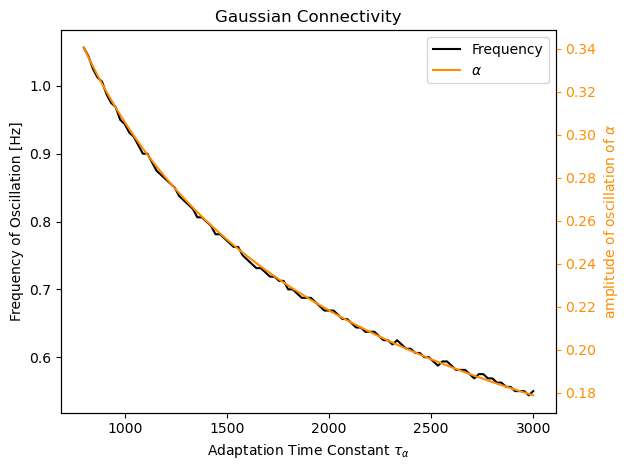

Rectangular Connectivity
amplitude_alpha start:  0.4207048678017442
amplitude_alpha stop:  0.19890070634145546
frequency start:  1.075
frequency stop:  0.61875



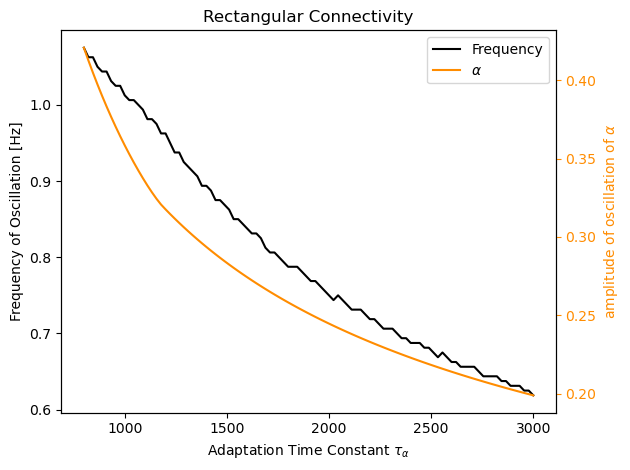

In [190]:
name = 'Simulation_Data/gauss_result_tau_alpha'
res = {}
with h5py.File(name, 'r') as f:
    for key in f:
        res[key] = f[key][()]
res['variable'] = res['variable'].decode('utf-8')

color_alpha = "darkorange"

print("Gaussian Connectivity")
print("amplitude_alpha start: ",res['amplitude_alpha'][0])
print("amplitude_alpha stop: ",res['amplitude_alpha'][-1])
print("frequency start: ",res['frequencies'][0])
print("frequency stop: ",res['frequencies'][-1])
print()

fig, ax1 = plt.subplots(1, 1)

# Create a second y-axis for the alpha
ax1.plot(res["variable_values"], res["frequencies"], label='Frequency [Hz]', color="black")
ax1.set_xlabel(r'Adaptation Time Constant $\tau_\alpha$')
ax1.set_ylabel('Frequency of Oscillation [Hz]')
ax1.set_title('Gaussian Connectivity')

# Create a second y-axis for the alpha
ax2 = ax1.twinx()
ax2.plot(res['variable_values'], res['amplitude_alpha'], color=color_alpha, label=r"$\alpha$")
ax2.set_ylabel(r'Amplitude of Oscillation of $\alpha$',  color=color_alpha)
ax2.tick_params('y',  colors=color_alpha)

fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
fig.tight_layout()
plt.show()

#######################################################################################################################

name = 'Simulation_Data/rect_result_tau_alpha'
res = {}
with h5py.File(name, 'r') as f:
    for key in f:
        res[key] = f[key][()]
res['variable'] = res['variable'].decode('utf-8')

print("Rectangular Connectivity")
print("amplitude_alpha start: ",res['amplitude_alpha'][0])
print("amplitude_alpha stop: ",res['amplitude_alpha'][-1])
print("frequency start: ",res['frequencies'][0])
print("frequency stop: ",res['frequencies'][-1])
print()

fig, ax1 = plt.subplots(1, 1)

# Create a second y-axis for the alpha
ax1.plot(res["variable_values"], res["frequencies"], label='Frequency [Hz]', color="black")
ax1.set_xlabel(r'Adaptation Time Constant $\tau_\alpha$')
ax1.set_ylabel('Frequency of Oscillation [Hz]')
ax1.set_title('Rectangular Connectivity')

# Create a second y-axis for the alpha
ax2 = ax1.twinx()
ax2.plot(res['variable_values'], res['amplitude_alpha'], color=color_alpha, label=r"$\alpha$")
ax2.set_ylabel(r'Amplitude of Oscillation of $\alpha$',  color=color_alpha)
ax2.tick_params('y',  colors=color_alpha)

fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)
fig.tight_layout()
plt.show()


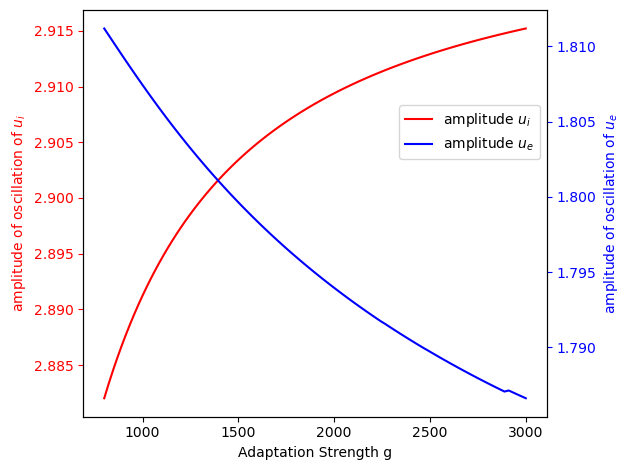

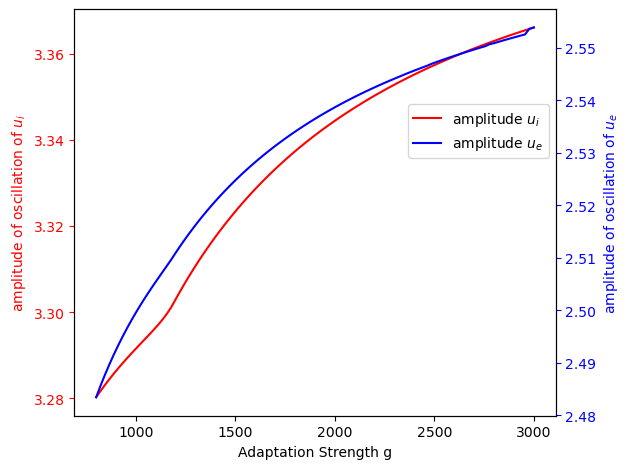

In [191]:
name = 'Simulation_Data/gauss_result_tau_alpha'
res = {}
with h5py.File(name, 'r') as f:
    for key in f:
        res[key] = f[key][()]
res['variable'] = res['variable'].decode('utf-8')

color_alpha = "darkorange"
color_e = "blue"
color_i = "red"

# Plot Frequency and alpha_amplitude
fig, ax1 = plt.subplots(1, 1)

# Create a second y-axis for the alpha
ax1.plot(res['variable_values'], res['amplitude_i'], color=color_i, label=r"amplitude $u_i$")
ax1.set_ylabel(r'Amplitude of Oscillation of $u_i$',  color=color_i)
ax1.set_xlabel('Adaptation Strength g')
ax1.tick_params('y',  colors=color_i)

# Create a second y-axis for the alpha
ax2 = ax1.twinx()
ax2.plot(res['variable_values'], res['amplitude_e'], color=color_e, label=r"amplitude $u_e$")
ax2.set_ylabel(r'Amplitude of Oscillation of $u_e$',  color=color_e)
ax2.tick_params('y',  colors=color_e)

fig.legend(loc="center right", bbox_to_anchor=(1,0.7), bbox_transform=ax1.transAxes)
fig.tight_layout()
plt.show()

#######################################################################################################################

name = 'Simulation_Data/rect_result_tau_alpha'
res = {}
with h5py.File(name, 'r') as f:
    for key in f:
        res[key] = f[key][()]
res['variable'] = res['variable'].decode('utf-8')

color_alpha = "darkorange"
color_e = "blue"
color_i = "red"

# Plot Frequency and alpha_amplitude
fig, ax1 = plt.subplots(1, 1)

# Create a second y-axis for the alpha
ax1.plot(res['variable_values'], res['amplitude_i'], color=color_i, label=r"amplitude $u_i$")
ax1.set_ylabel(r'Amplitude of Oscillation of $u_i$',  color=color_i)
ax1.set_xlabel('Adaptation Strength g')
ax1.tick_params('y',  colors=color_i)

# Create a second y-axis for the alpha
ax2 = ax1.twinx()
ax2.plot(res['variable_values'], res['amplitude_e'], color=color_e, label=r"amplitude $u_e$")
ax2.set_ylabel(r'Amplitude of Oscillation of $u_e$',  color=color_e)
ax2.tick_params('y',  colors=color_e)

fig.legend(loc="center right", bbox_to_anchor=(1,0.7), bbox_transform=ax1.transAxes)
fig.tight_layout()
plt.show()